In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/.config/.last_opt_in_prompt.yaml
/content/.config/gce
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_update_check.json
/content/.config/config_sentinel
/content/.config/default_configs.db
/content/.config/active_config
/content/.config/logs/2024.06.14/17.38.49.910604.log
/content/.config/logs/2024.06.14/17.38.58.635304.log
/content/.config/logs/2024.06.14/17.38.14.830445.log
/content/.config/logs/2024.06.14/17.38.38.781607.log
/content/.config/logs/2024.06.14/17.39.09.707862.log
/content/.config/logs/2024.06.14/17.39.10.317752.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_train.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv


In [4]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [5]:
ass = pd.read_csv('/assessments.csv')
courses = pd.read_csv('/courses.csv')
results = pd.read_csv('/studentAssessment.csv')
info = pd.read_csv('/studentInfo.csv')
reg = pd.read_csv('/studentRegistration.csv')

vle = pd.read_csv('/vle.csv')

In [6]:


svle= pd.read_csv('/studentVle.csv')

a=svle.head(5)
print(a)


b=svle.shape
print(b)
print(svle.dtypes)
svle.describe()


  code_module code_presentation  id_student   id_site  date  sum_click
0         AAA             2013J     28400.0  546652.0 -10.0        4.0
1         AAA             2013J     28400.0  546652.0 -10.0        1.0
2         AAA             2013J     28400.0  546652.0 -10.0        1.0
3         AAA             2013J     28400.0  546614.0 -10.0       11.0
4         AAA             2013J     28400.0  546714.0 -10.0        1.0
(2243524, 6)
code_module           object
code_presentation     object
id_student           float64
id_site              float64
date                 float64
sum_click            float64
dtype: object


id_student       id_site          date     sum_click
count  2.243523e+06  2.243523e+06  2.243523e+06  2.243523e+06
mean   7.577006e+05  7.291923e+05  8.888535e+01  3.422300e+00
std    6.468020e+05  1.344491e+05  7.374637e+01  6.892611e+00
min    6.516000e+03  5.427920e+05 -2.400000e+01  1.000000e+00
25%    4.785500e+05  5.468790e+05  2.300000e+01  1.000000e+00
50%    5.756810e+05  7.296780e+05  7.300000e+01  2.000000e+00
75%    6.443620e+05  8.770260e+05  1.470000e+02  4.000000e+00
max    2.698588e+06  1.010323e+06  2.690000e+02  2.664000e+03

The table comprises of the following columns:

1.id_site – an identification number of the material.
2.code_module – an identification code for module.
3.code_presentation - the identification code of presentation.
4.activity_type – the role associated with the module material.
5.week_from – the week from which the material is planned to be used.
6.week_to – week until which the material is planned to be used.


In [7]:
null_counts = svle.isnull().sum()
null_counts

code_module          0
code_presentation    1
id_student           1
id_site              1
date                 1
sum_click            1
dtype: int64

In [8]:

a=info.head(5)
print(a)


b=info.shape
print(b)
print(info.dtypes)
info.describe()

  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   
3  A Level or Equivalent   50-60%    35-55                     0   
4     Lower Than A Level   50-60%     0-35                     0   

   studied_credits disability final_result  
0              240          N         Pass  
1               60          N         Pass  

id_student  num_of_prev_attempts  studied_credits
count  3.259300e+04          32593.000000     32593.000000
mean   7.066877e+05              0.163225        79.758691
std    5.491673e+05              0.479758        41.071900
min    3.733000e+03              0.000000        30.000000
25%    5.085730e+05              0.000000        60.000000
50%    5.903100e+05              0.000000        60.000000
75%    6.444530e+05              0.000000       120.000000
max    2.716795e+06              6.000000       655.000000


This file contains demographic information about the students together with their results. File contains the following columns:

1.code_module – an identification code for a module on which the student is registered.
2.code_presentation - the identification code of the presentation during which the student is registered on the module.
3.id_student – a unique identification number for the student.
4.gender – the student’s gender.
5.region – identifies the geographic region, where the student lived while taking the module-presentation.
6.highest_education – highest student education level on entry to the module presentation.
7.imd_band – specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.
8.age_band – band of the student’s age.
9.num_of_prev_attempts – the number times the student has attempted this module.
10.studied_credits – the total number of credits for the modules the student is currently studying.
11.disability – indicates whether the student has declared a disability.
12.final_result – student’s final result in the module-presentation.

In [9]:
null_counts = info.isnull().sum()
null_counts

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [10]:
stu_info = info['imd_band'].mode()[0]
info['imd_band'].fillna(stu_info, inplace=True)


In [11]:
null_counts = info.isnull().sum()
null_counts


code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

In [12]:


a=courses.head(5)
print(a)


b=courses.shape
print(b)
print(courses.dtypes)
courses.describe()


  code_module code_presentation  module_presentation_length
0         AAA             2013J                         268
1         AAA             2014J                         269
2         BBB             2013J                         268
3         BBB             2014J                         262
4         BBB             2013B                         240
(22, 3)
code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object


module_presentation_length
count                   22.000000
mean                   255.545455
std                     13.654677
min                    234.000000
25%                    241.000000
50%                    261.500000
75%                    268.000000
max                    269.000000

File contains the list of all available modules and their details. The columns are:

1.code_module – code name of the module, which serves as the identifier.

2.code_presentation – code name of the presentation. It consists of the year and “B” for the presentation starting in February and “J” for the presentation starting in October.

3.length - length of the module-presentation in days.

In [13]:
null_counts = courses.isnull().sum()
null_counts

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [14]:
a=vle.head(5)
print(a)


b=vle.shape
print(b)
print(vle.dtypes)
vle.describe()

   id_site code_module code_presentation activity_type  week_from  week_to
0   546943         AAA             2013J      resource        NaN      NaN
1   546712         AAA             2013J     oucontent        NaN      NaN
2   546998         AAA             2013J      resource        NaN      NaN
3   546888         AAA             2013J           url        NaN      NaN
4   547035         AAA             2013J      resource        NaN      NaN
(6364, 6)
id_site                int64
code_module           object
code_presentation     object
activity_type         object
week_from            float64
week_to              float64
dtype: object


id_site    week_from      week_to
count  6.364000e+03  1121.000000  1121.000000
mean   7.260991e+05    15.204282    15.214987
std    1.283151e+05     8.792865     8.779806
min    5.267210e+05     0.000000     0.000000
25%    6.615928e+05     8.000000     8.000000
50%    7.300965e+05    15.000000    15.000000
75%    8.140162e+05    22.000000    22.000000
max    1.077905e+06    29.000000    29.000000

The studentVle.csv file contains information about each student’s interactions with the materials in the VLE. This file contains the following columns:

1.code_module – an identification code for a module.
2.code_presentation - the identification code of the module presentation.
3.id_student – a unique identification number for the student.
4.id_site - an identification number for the VLE material.
5.date – the date of student’s interaction with the material measured as the number of days since the start of the module-presentation.
6.sum_click – the number of times a student interacts with the material in



In [15]:
null_counts = vle.isnull().sum()
null_counts

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

Drop column week_from and week_to  

In [16]:
vle=vle.drop(['week_from', 'week_to'], axis=1)
vle.head()

id_site code_module code_presentation activity_type
0   546943         AAA             2013J      resource
1   546712         AAA             2013J     oucontent
2   546998         AAA             2013J      resource
3   546888         AAA             2013J           url
4   547035         AAA             2013J      resource

In [17]:
a=ass.head(5)
print(a)


b=ass.shape
print(b)
print(ass.dtypes)
ass.describe()

  code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
3         AAA             2013J           1755             TMA  166.0    20.0
4         AAA             2013J           1756             TMA  215.0    30.0
(206, 6)
code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object


id_assessment        date      weight
count     206.000000  195.000000  206.000000
mean    26473.975728  145.005128   20.873786
std     10098.625521   76.001119   30.384224
min      1752.000000   12.000000    0.000000
25%     15023.250000   71.000000    0.000000
50%     25364.500000  152.000000   12.500000
75%     34891.750000  222.000000   24.250000
max     40088.000000  261.000000  100.000000

This file contains information about assessments in module-presentations. Usually, every presentation has a number of assessments followed by the final exam. CSV contains columns:

1.code_module – identification code of the module, to which the assessment belongs.

2.code_presentation - identification code of the presentation, to which the assessment belongs.

3.id_assessment – identification number of the assessment.

4.assessment_type – type of assessment. Three types of assessments exist: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam).

5.date – information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero).

6.weight - weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%. If the information about the final exam date is missing, it is at the end of the last presentation week.

In [18]:
null_counts = ass.isnull().sum()
null_counts


code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [19]:
ass = ass.fillna(ass.min())
null_counts = ass.isnull().sum()
null_counts


code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

In [20]:
a=reg.head(5)
print(a)


b=reg.shape
print(b)
print(reg.dtypes)
reg.describe()

  code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   

   date_unregistration  
0                  NaN  
1                  NaN  
2                 12.0  
3                  NaN  
4                  NaN  
(32593, 5)
code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object


id_student  date_registration  date_unregistration
count  3.259300e+04       32548.000000         10072.000000
mean   7.066877e+05         -69.411300            49.757645
std    5.491673e+05          49.260522            82.460890
min    3.733000e+03        -322.000000          -365.000000
25%    5.085730e+05        -100.000000            -2.000000
50%    5.903100e+05         -57.000000            27.000000
75%    6.444530e+05         -29.000000           109.000000
max    2.716795e+06         167.000000           444.000000

 File contains five columns:

1.code_module – an identification code for a module.

2.code_presentation - the identification code of the presentation.

3.id_student – a unique identification number for the student.

4.date_registration – the date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).

5.date_unregistration – date of student un-registration from the module presentation, this is the number of days measured relative to the start of the module-presentation.

In [21]:
null_counts = reg.isnull().sum()
null_counts


code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

almost 70 % data of date_unregistration is missing. it means 70 % students attempts for final exam

In [22]:
# Fill null values in 'date_registration' with the mode of the column
date_registration_mode = reg['date_registration'].mode()[0]
stu_reg=reg['date_registration'].fillna(date_registration_mode, inplace=True)

# Fill null values in 'date_unregistration' with the mode of the column
date_unregistration_mode = reg['date_unregistration'].mode()[0]
reg['date_unregistration'].fillna(date_unregistration_mode, inplace=True)

null_counts = reg.isnull().sum()
null_counts



code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    0
dtype: int64

In [23]:
a=results.head(5)
print(a)


b=results.shape
print(b)
print(results.dtypes)
results.describe()

   id_assessment  id_student  date_submitted  is_banked  score
0           1752       11391              18          0   78.0
1           1752       28400              22          0   70.0
2           1752       31604              17          0   72.0
3           1752       32885              26          0   69.0
4           1752       38053              19          0   79.0
(173912, 5)
id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object


id_assessment    id_student  date_submitted      is_banked  \
count  173912.000000  1.739120e+05   173912.000000  173912.000000   
mean    26553.803556  7.051507e+05      116.032942       0.010977   
std      8829.784254  5.523952e+05       71.484148       0.104194   
min      1752.000000  6.516000e+03      -11.000000       0.000000   
25%     15022.000000  5.044290e+05       51.000000       0.000000   
50%     25359.000000  5.852080e+05      116.000000       0.000000   
75%     34883.000000  6.344980e+05      173.000000       0.000000   
max     37443.000000  2.698588e+06      608.000000       1.000000   

               score  
count  173739.000000  
mean       75.799573  
std        18.798107  
min         0.000000  
25%        65.000000  
50%        80.000000  
75%        90.000000  
max       100.000000

This file contains the following columns:

1.id_assessment – the identification number of the assessment.

2.id_student – a unique identification number for the student.

3.date_submitted – the date of student submission, measured as the number of days since the start of the module presentation.

4.is_banked – a status flag indicating that the assessment result has been transferred from a previous presentation.

5.score – the student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. The marks are in the range from 0 to 100.

In [24]:
null_counts = results.isnull().sum()
null_counts


id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [25]:
results = results.fillna(results.median())
null_counts = results.isnull().sum()
null_counts

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

In [26]:

# Merge with an inner join
STU_VLE = pd.merge(vle, svle, on=['code_module', 'code_presentation', 'id_site'], how='inner')

Exploratory Data analysis

1. univariate data analysis


In [27]:
STU_VLE.head()

id_site code_module code_presentation activity_type  id_student  date  \
0   546943         AAA             2013J      resource     75091.0 -10.0   
1   546943         AAA             2013J      resource    186149.0 -10.0   
2   546943         AAA             2013J      resource    205350.0 -10.0   
3   546943         AAA             2013J      resource   1626710.0  -9.0   
4   546943         AAA             2013J      resource   2643002.0  -8.0   

   sum_click  
0        1.0  
1        1.0  
2        2.0  
3        1.0  
4        1.0

In [28]:
STU_VLE\
.groupby(['code_module', 'code_presentation', 'id_student'])\
.agg(total_click = ("sum_click",sum)).reset_index()


code_module code_presentation  id_student  total_click
0            AAA             2013J     11391.0        934.0
1            AAA             2013J     28400.0       1435.0
2            AAA             2013J     30268.0        281.0
3            AAA             2013J     31604.0       2158.0
4            AAA             2013J     32885.0       1034.0
...          ...               ...         ...          ...
9032         CCC             2014B   2686074.0         34.0
9033         CCC             2014B   2686578.0        779.0
9034         CCC             2014B   2692327.0       1627.0
9035         CCC             2014B   2697181.0       1330.0
9036         CCC             2014B   2698535.0        584.0

[9037 rows x 4 columns]

In [29]:
total_click_per_student = STU_VLE\
.groupby(['code_module', 'code_presentation', 'id_student'])\
.agg(total_click = ("sum_click",sum))\
.reset_index()

total_click_per_student.head(7)

code_module code_presentation  id_student  total_click
0         AAA             2013J     11391.0        934.0
1         AAA             2013J     28400.0       1435.0
2         AAA             2013J     30268.0        281.0
3         AAA             2013J     31604.0       2158.0
4         AAA             2013J     32885.0       1034.0
5         AAA             2013J     38053.0       2445.0
6         AAA             2013J     45462.0       1492.0

student registration info , courses  and student info.

In [30]:

regCourses = pd.merge(reg, courses, on=['code_module', 'code_presentation'], how='inner')
regCourses.head()

code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   

   date_unregistration  module_presentation_length  
0                 12.0                         268  
1                 12.0                         268  
2                 12.0                         268  
3                 12.0                         268  
4                 12.0                         268

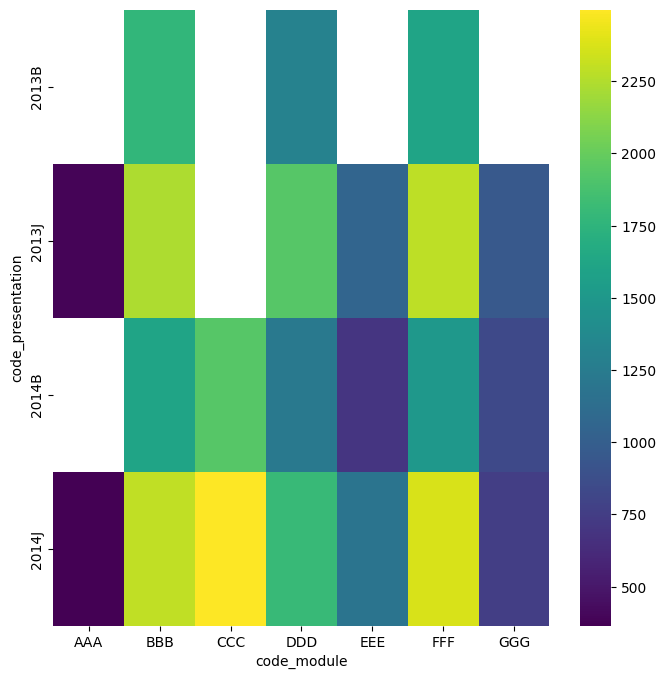

In [31]:
# @title code_module vs code_presentation

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['code_presentation'].value_counts()
    for x_label, grp in regCourses.groupby('code_module')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('code_module')
_ = plt.ylabel('code_presentation')

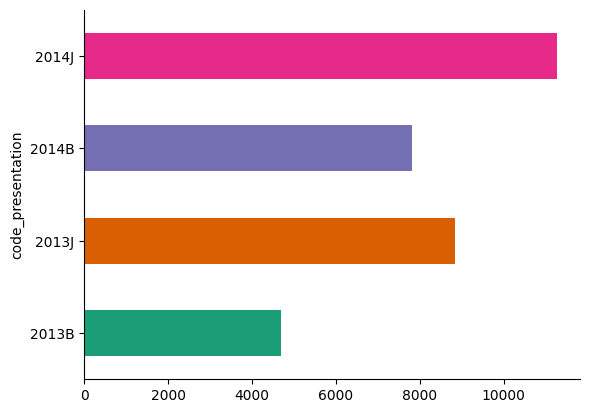

In [32]:
# @title code_presentation

from matplotlib import pyplot as plt
import seaborn as sns
regCourses.groupby('code_presentation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

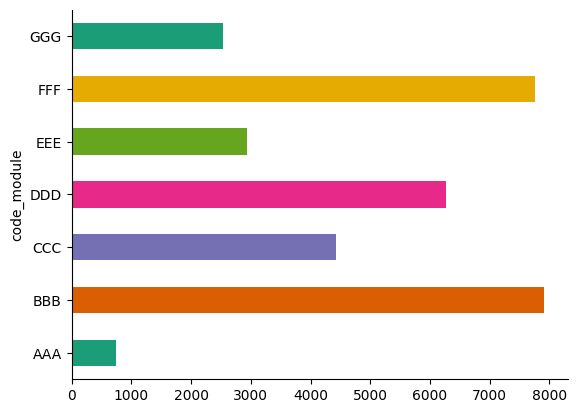

In [33]:
# @title code_module

from matplotlib import pyplot as plt
import seaborn as sns
regCourses.groupby('code_module').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [34]:
regCoursesInfo = pd.merge(regCourses, info, on=['code_module', 'code_presentation', 'id_student'], how='inner')
regCoursesInfo.head()

code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   

   date_unregistration  module_presentation_length gender  \
0                 12.0                         268      M   
1                 12.0                         268      F   
2                 12.0                         268      F   
3                 12.0                         268      F   
4                 12.0                         268      F   

                 region      highest_education imd_band age_band  \
0   East Anglian Region       HE Qualification  90-100%     55<=   
1              Scotland       HE Qualification   20-30%    35-55   
2  North Western Region  A Level or Equivalent   30-40%    35-55   
3     South East Region  A Level or Equivalent   50-60%    35-55   
4  West Midlands Region     Lower Than A Level   50-60%     0-35   

   num_of_prev_attempts  studied_credits disability final_result  
0                     0              240          N         Pass  
1                     0               60          N         Pass  
2                     0               60          Y    Withdrawn  
3                     0               60          N         Pass  
4                     0               60          N         Pass

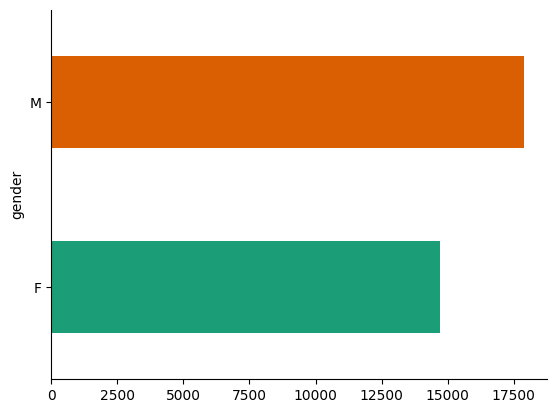

In [35]:
# @title gender

from matplotlib import pyplot as plt
import seaborn as sns
regCoursesInfo.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

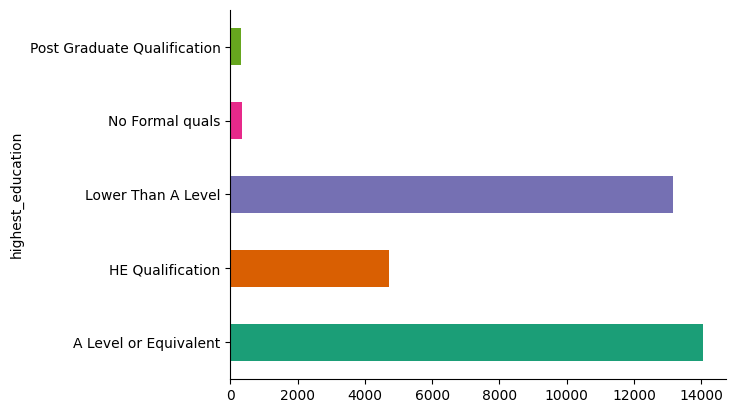

In [36]:
# @title highest_education

from matplotlib import pyplot as plt
import seaborn as sns
regCoursesInfo.groupby('highest_education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

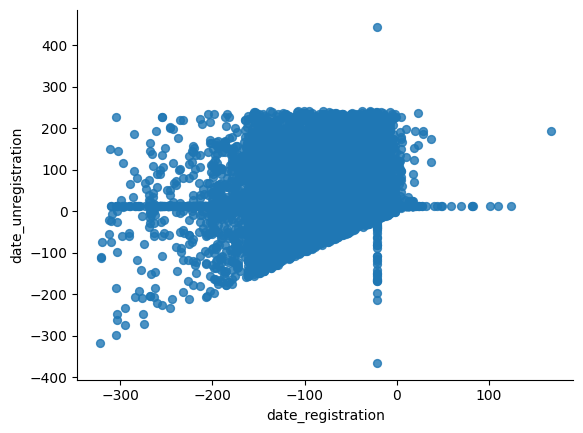

In [37]:
# @title date_registration vs date_unregistration

from matplotlib import pyplot as plt
regCoursesInfo.plot(kind='scatter', x='date_registration', y='date_unregistration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Assessment info and assessment results

In [38]:

assResults = pd.merge(ass, results, on=['id_assessment'], how='inner')

# Rearrange column names

assResults = assResults[['id_student', 'code_module', 'code_presentation', 'id_assessment', 'assessment_type', 'date', 'date_submitted', 'weight', 'is_banked', 'score']]

assResults.head()

id_student code_module code_presentation  id_assessment assessment_type  \
0       11391         AAA             2013J           1752             TMA   
1       28400         AAA             2013J           1752             TMA   
2       31604         AAA             2013J           1752             TMA   
3       32885         AAA             2013J           1752             TMA   
4       38053         AAA             2013J           1752             TMA   

   date  date_submitted  weight  is_banked  score  
0  19.0              18    10.0          0   78.0  
1  19.0              22    10.0          0   70.0  
2  19.0              17    10.0          0   72.0  
3  19.0              26    10.0          0   69.0  
4  19.0              19    10.0          0   79.0

**Feature Engineering**

How it will be calculated:
To calculate the total weight of all modules, we need to remember that most final exams are missing from the Results table.
Multiply the weight of the assignment with its score.
Aggregate the dataframe per weight*score per module per module presentation with the sum function.
Calculate total recorded weight of module (recorded total is key here as most modules are missing their final exam).
Now calculate weighted scores - divide summed weight*score by total recorded weight of module

In [39]:
scores=assResults
scores[scores['assessment_type'] == 'Exam'][['code_module', 'code_presentation', 'id_assessment']]\
.groupby(['code_module', 'code_presentation'])\
.nunique()

id_assessment
code_module code_presentation               
CCC         2014B                          1
            2014J                          1
DDD         2013B                          1
            2013J                          1
            2014B                          1
            2014J                          1

CCC module only has results for 1 exam when the module should have 2 exams in total.

DDD module has results for the final exam (DDD module should have one exam in total).

In [40]:
### Make helper columns ###
# (a) Add column multiplying weight and score
scores['weight*score'] = scores['weight']*scores['score']
# (b) Aggregate recorded weight*score per student
    # per module presentation
sum_scores = scores\
.groupby(['id_student', 'code_module', 'code_presentation'])\
.agg(weightByScore = ('weight*score', sum))\
.reset_index()
# (c) Calculate total recorded weight of module
# (c.i) Get total weight of modules
total_weight = ass\
.groupby(['code_module', 'code_presentation'])\
.agg(total_weight = ('weight', sum))\
.reset_index()
# (c.ii) Subtract 100 to account for missing exams
total_weight['total_weight'] = total_weight['total_weight']-100
# (c.iii) Mark module DDD as having 200 credits
total_weight.loc[(total_weight.code_module == 'DDD'), 'total_weight'] = 200

### Calculate weighted score ###
# (a) Merge sum_scores and total_weight tables
score_weights = pd.merge(sum_scores, total_weight, on=['code_module', 'code_presentation'], how='inner')
# (b) Calculate weighted score
score_weights['weighted_score'] = score_weights['weightByScore'] / score_weights['total_weight']
# (c) Drop helper columns
score_weights.drop(columns=['weightByScore', 'total_weight'], inplace=True)

In [41]:
score_weights.head()

id_student code_module code_presentation  weighted_score
0        6516         AAA             2014J            63.5
1       24734         AAA             2014J            47.5
2       26192         AAA             2014J            86.3
3       28061         AAA             2014J            77.4
4       31600         AAA             2014J            55.5


**Late submission**

How will be calculated
Calculate the difference between the deadline and the actual submission date.

Make a new column - if the difference between dates is more that ), the submission was late.

Aggregate by student ID, module, and module presenation

In [42]:
# Calculate the difference between the submission dates
lateSubmission = assResults.assign(submission_days=assResults['date_submitted']-assResults['date'])
# Make a column indicating if the submission was late or not
lateSubmission = lateSubmission.assign(late_submission=lateSubmission['submission_days'] > 0)

lateSubmission.head()

id_student code_module code_presentation  id_assessment assessment_type  \
0       11391         AAA             2013J           1752             TMA   
1       28400         AAA             2013J           1752             TMA   
2       31604         AAA             2013J           1752             TMA   
3       32885         AAA             2013J           1752             TMA   
4       38053         AAA             2013J           1752             TMA   

   date  date_submitted  weight  is_banked  score  weight*score  \
0  19.0              18    10.0          0   78.0         780.0   
1  19.0              22    10.0          0   70.0         700.0   
2  19.0              17    10.0          0   72.0         720.0   
3  19.0              26    10.0          0   69.0         690.0   
4  19.0              19    10.0          0   79.0         790.0   

   submission_days  late_submission  
0             -1.0            False  
1              3.0             True  
2             -2.0            False  
3              7.0             True  
4              0.0            False

In [43]:
lateSubmission[(lateSubmission['assessment_type'] == 'Exam') & (lateSubmission['late_submission'] == True)]

id_student code_module code_presentation  id_assessment  \
52923      558914         CCC             2014B          24290   
52924      559706         CCC             2014B          24290   
52925      559770         CCC             2014B          24290   
52926      560114         CCC             2014B          24290   
52927      560311         CCC             2014B          24290   
...           ...         ...               ...            ...   
95980      652680         DDD             2014J          25368   
95981      652732         DDD             2014J          25368   
95982      652965         DDD             2014J          25368   
95983      653051         DDD             2014J          25368   
95984      653319         DDD             2014J          25368   

      assessment_type  date  date_submitted  weight  is_banked  score  \
52923            Exam  12.0             230   100.0          0   32.0   
52924            Exam  12.0             234   100.0          0   78.0   
52925            Exam  12.0             230   100.0          0   54.0   
52926            Exam  12.0             230   100.0          0   64.0   
52927            Exam  12.0             234   100.0          0  100.0   
...               ...   ...             ...     ...        ...    ...   
95980            Exam  12.0             243   100.0          0   91.0   
95981            Exam  12.0             249   100.0          0   47.0   
95982            Exam  12.0             242   100.0          0   87.0   
95983            Exam  12.0             242   100.0          0   27.0   
95984            Exam  12.0             250   100.0          0   64.0   

       weight*score  submission_days  late_submission  
52923        3200.0            218.0             True  
52924        7800.0            222.0             True  
52925        5400.0            218.0             True  
52926        6400.0            218.0             True  
52927       10000.0            222.0             True  
...             ...              ...              ...  
95980        9100.0            231.0             True  
95981        4700.0            237.0             True  
95982        8700.0            230.0             True  
95983        2700.0            230.0             True  
95984        6400.0            238.0             True  

[2872 rows x 13 columns]

In [44]:
# Aggregate per student per module presentation
total_late_per_student = lateSubmission\
.groupby(['id_student', 'code_module', 'code_presentation'])\
.agg(total_late_submission = ('late_submission', sum))\
.reset_index()

total_late_per_student.head()

id_student code_module code_presentation  total_late_submission
0        6516         AAA             2014J                      0
1        8462         DDD             2013J                      1
2        8462         DDD             2014J                      0
3       11391         AAA             2013J                      0
4       23629         BBB             2013B                      3

In [45]:
# Make a df with total number of all assessments per student per module presentation
total_count_assessments = lateSubmission[['id_student', 'code_module', 'code_presentation', 'id_assessment']]\
.groupby(['id_student', 'code_module', 'code_presentation'])\
.size()\
.reset_index(name='total_assessments')

total_count_assessments.head()

id_student code_module code_presentation  total_assessments
0        6516         AAA             2014J                  5
1        8462         DDD             2013J                  3
2        8462         DDD             2014J                  4
3       11391         AAA             2013J                  5
4       23629         BBB             2013B                  4

In [46]:
# Merge df with total late assessements and total count assessments
late_rate_per_student = pd.merge(total_late_per_student, total_count_assessments, on=['id_student', 'code_module', 'code_presentation'], how='inner')
# Make a new column with late submission rate
late_rate_per_student['late_rate'] = late_rate_per_student['total_late_submission'] / late_rate_per_student['total_assessments']
# Drop helper columns
late_rate_per_student.drop(columns=['total_late_submission', 'total_assessments'], inplace=True)

late_rate_per_student

id_student code_module code_presentation  late_rate
0            6516         AAA             2014J   0.000000
1            8462         DDD             2013J   0.333333
2            8462         DDD             2014J   0.000000
3           11391         AAA             2013J   0.000000
4           23629         BBB             2013B   0.750000
...           ...         ...               ...        ...
25838     2698257         AAA             2013J   0.400000
25839     2698535         CCC             2014B   0.750000
25840     2698535         EEE             2013J   0.250000
25841     2698577         BBB             2014J   0.000000
25842     2698588         BBB             2014J   0.200000

[25843 rows x 4 columns]

**Fail rate**

In [47]:
# Define function for marking failed assignments
passRate = assResults
passRate = passRate.assign(fail=passRate['score'] < 40)

passRate.head()

id_student code_module code_presentation  id_assessment assessment_type  \
0       11391         AAA             2013J           1752             TMA   
1       28400         AAA             2013J           1752             TMA   
2       31604         AAA             2013J           1752             TMA   
3       32885         AAA             2013J           1752             TMA   
4       38053         AAA             2013J           1752             TMA   

   date  date_submitted  weight  is_banked  score  weight*score   fail  
0  19.0              18    10.0          0   78.0         780.0  False  
1  19.0              22    10.0          0   70.0         700.0  False  
2  19.0              17    10.0          0   72.0         720.0  False  
3  19.0              26    10.0          0   69.0         690.0  False  
4  19.0              19    10.0          0   79.0         790.0  False

In [48]:
# Aggregate per student per module presentation
total_fails_per_student = passRate\
.groupby(['id_student', 'code_module', 'code_presentation'])\
.agg(total_fails = ("fail",sum))\
.reset_index()

total_fails_per_student.head()

id_student code_module code_presentation  total_fails
0        6516         AAA             2014J            0
1        8462         DDD             2013J            0
2        8462         DDD             2014J            0
3       11391         AAA             2013J            0
4       23629         BBB             2013B            0

In [49]:
# Merge df with total fails and total count assessments
fail_rate_per_student = pd.merge(total_fails_per_student, total_count_assessments, on=['id_student', 'code_module', 'code_presentation'], how='inner')
# Make a new column with late submission rate
fail_rate_per_student['fail_rate'] = fail_rate_per_student['total_fails'] / fail_rate_per_student['total_assessments']
# Drop helper columns
fail_rate_per_student.drop(columns=['total_fails', 'total_assessments'], inplace=True)

fail_rate_per_student

id_student code_module code_presentation  fail_rate
0            6516         AAA             2014J       0.00
1            8462         DDD             2013J       0.00
2            8462         DDD             2014J       0.00
3           11391         AAA             2013J       0.00
4           23629         BBB             2013B       0.00
...           ...         ...               ...        ...
25838     2698257         AAA             2013J       0.00
25839     2698535         CCC             2014B       0.75
25840     2698535         EEE             2013J       0.25
25841     2698577         BBB             2014J       0.00
25842     2698588         BBB             2014J       0.00

[25843 rows x 4 columns]

Merged all result tables

In [50]:
assessments = pd.merge(score_weights, late_rate_per_student, on=['id_student', 'code_module', 'code_presentation'], how='inner')
assessments = pd.merge(assessments, fail_rate_per_student, on=['id_student', 'code_module', 'code_presentation'], how='inner')

assessments.head()

id_student code_module code_presentation  weighted_score  late_rate  \
0        6516         AAA             2014J            63.5        0.0   
1       24734         AAA             2014J            47.5        0.8   
2       26192         AAA             2014J            86.3        0.0   
3       28061         AAA             2014J            77.4        0.2   
4       31600         AAA             2014J            55.5        0.6   

   fail_rate  
0        0.0  
1        0.2  
2        0.0  
3        0.0  
4        0.0

Merge all tables


In [51]:
merged = pd.merge(regCoursesInfo, total_click_per_student, on=['id_student', 'code_module', 'code_presentation'], how='left')

merged.head()

code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   

   date_unregistration  module_presentation_length gender  \
0                 12.0                         268      M   
1                 12.0                         268      F   
2                 12.0                         268      F   
3                 12.0                         268      F   
4                 12.0                         268      F   

                 region      highest_education imd_band age_band  \
0   East Anglian Region       HE Qualification  90-100%     55<=   
1              Scotland       HE Qualification   20-30%    35-55   
2  North Western Region  A Level or Equivalent   30-40%    35-55   
3     South East Region  A Level or Equivalent   50-60%    35-55   
4  West Midlands Region     Lower Than A Level   50-60%     0-35   

   num_of_prev_attempts  studied_credits disability final_result  total_click  
0                     0              240          N         Pass        934.0  
1                     0               60          N         Pass       1435.0  
2                     0               60          Y    Withdrawn        281.0  
3                     0               60          N         Pass       2158.0  
4                     0               60          N         Pass       1034.0

In [52]:

merged = pd.merge(merged, assessments, on=['id_student', 'code_module', 'code_presentation'], how='left')

merged.head()

code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   

   date_unregistration  module_presentation_length gender  \
0                 12.0                         268      M   
1                 12.0                         268      F   
2                 12.0                         268      F   
3                 12.0                         268      F   
4                 12.0                         268      F   

                 region      highest_education imd_band age_band  \
0   East Anglian Region       HE Qualification  90-100%     55<=   
1              Scotland       HE Qualification   20-30%    35-55   
2  North Western Region  A Level or Equivalent   30-40%    35-55   
3     South East Region  A Level or Equivalent   50-60%    35-55   
4  West Midlands Region     Lower Than A Level   50-60%     0-35   

   num_of_prev_attempts  studied_credits disability final_result  total_click  \
0                     0              240          N         Pass        934.0   
1                     0               60          N         Pass       1435.0   
2                     0               60          Y    Withdrawn        281.0   
3                     0               60          N         Pass       2158.0   
4                     0               60          N         Pass       1034.0   

   weighted_score  late_rate  fail_rate  
0            82.4        0.0        0.0  
1            65.4        0.4        0.0  
2             NaN        NaN        NaN  
3            76.3        0.0        0.0  
4            55.0        1.0        0.4

**SPLIT THE DATASET**

In [53]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(merged, test_size=0.2, random_state=42, stratify=merged['code_module'])

Final Cleaning

. Missing values

In [54]:
train.isnull().sum()

code_module                       0
code_presentation                 0
id_student                        0
date_registration                 0
date_unregistration               0
module_presentation_length        0
gender                            0
region                            0
highest_education                 0
imd_band                          0
age_band                          0
num_of_prev_attempts              0
studied_credits                   0
disability                        0
final_result                      0
total_click                   18866
weighted_score                 7117
late_rate                      5434
fail_rate                      5434
dtype: int64

IMD band

In [55]:
train\
[train['imd_band'].isnull()]\
.head()

Empty DataFrame
Columns: [code_module, code_presentation, id_student, date_registration, date_unregistration, module_presentation_length, gender, region, highest_education, imd_band, age_band, num_of_prev_attempts, studied_credits, disability, final_result, total_click, weighted_score, late_rate, fail_rate]
Index: []

In [56]:
train.head()

code_module code_presentation  id_student  date_registration  \
16563         DDD             2014B      464685              -36.0   
16006         DDD             2013J      606593              -32.0   
12884         CCC             2014J     1674799              -21.0   
27781         FFF             2014J      195246             -124.0   
25125         FFF             2013J      582080             -114.0   

       date_unregistration  module_presentation_length gender  \
16563                 12.0                         241      F   
16006                122.0                         261      M   
12884                 12.0                         269      M   
27781                 12.0                         269      M   
25125                 12.0                         268      M   

                     region      highest_education imd_band age_band  \
16563   East Anglian Region  A Level or Equivalent   50-60%     0-35   
16006              Scotland  A Level or Equivalent   20-30%     0-35   
12884          South Region       HE Qualification   70-80%     55<=   
27781  West Midlands Region     Lower Than A Level    10-20     0-35   
25125     South East Region     Lower Than A Level    10-20    35-55   

       num_of_prev_attempts  studied_credits disability final_result  \
16563                     1               70          N         Pass   
16006                     0              120          N    Withdrawn   
12884                     0               60          N         Pass   
27781                     0               60          N         Fail   
25125                     0               60          N         Fail   

       total_click  weighted_score  late_rate  fail_rate  
16563          NaN         64.9125   0.142857        0.0  
16006          NaN         14.8625   0.000000        0.0  
12884          NaN         61.4300   0.875000        0.0  
27781          NaN         39.5000   0.181818        0.0  
25125          NaN          9.2500   0.000000        0.0

How to fill out missing values here - fill out according to the most frequent band for that region:

1.Find which regions have null imd_band values

2.Find what band is the most frequent one for that region

3.Replace null values with most frequent values for that region.

In [57]:


regions_list = list(train[train['imd_band'].isnull()]['region'].unique())

for i in regions_list:

    result = train[train['region'] == i].imd_band.mode()

    print(f'{i} IMD band : \n', result)

In [58]:
# Replace all null values with respective most frequent imd_bands
regions_list = list(train\
                    [train['imd_band'].isnull()]['region']\
                    .unique())

for i in regions_list:
    train['imd_band'] = np.where( ( (train['imd_band'].isnull()) & (train['region'] == i) ),
                                           train[train['region'] == i].imd_band.mode(),
                                           train['imd_band']
                                    )

Date registration

In [59]:
# Make a new dataframe just with rows that have null values for the registration date
reg_date_nulls_in_reg = train\
[train['date_registration'].isnull()]

In [60]:
# What are their final results?
column = reg_date_nulls_in_reg['final_result']

unique, counts = np.unique(column, return_counts = True)

dict(zip(unique, counts))

{}

In [61]:

# Get median registration date
train.date_registration.median()

-57.0

In [62]:
# Replace NaN values with date_unreg minus the median (note, the median is negative)
train['date_registration'] = np.where( (train['date_registration'].isnull()),
                                           train['date_unregistration'] + train.date_registration.median(),
                                           train['date_registration']
                                    )
# Replace remaining NaNs with -57
train['date_registration'] = np.where( (train['date_registration'].isnull()),
                                           train.date_registration.median(),
                                           train['date_registration']
                                    )

Total_click

In [63]:
train['total_click'] = train['total_click'].replace(np.nan).fillna(0)

weighted_score

In [64]:
train['weighted_score'] = train['weighted_score'].replace(np.nan).fillna(0)

late_rate

In [65]:
train['late_rate'] = train['late_rate'].replace(np.nan).fillna(1.0)

fail_rate

In [66]:
train['fail_rate'] = train['fail_rate'].replace(np.nan).fillna(1.0)

**drop columns**

In [67]:
# Make a copy of training and test datasets for classification
train_class = train.copy()
test_class = test.copy()

For Regresion

Date unregistration has been dropped as it should be the same metric as Withdrawal in the final results column of Student Information table. I'm assuming the prediction for who is likely to withdraw would only be useful if trying to predict future withdrawals, trying to predict if a student has withdrawn when we know they have withdrawn is useless (date_unregistration is essentially another target).
For the regression problem due to the contuinous nature of the target variable, we can't distinguish between fails and witdrawals, so all withdrawals will be treated as fails (score < 40%).

In [68]:
# Drop unneeded columns
train.drop(columns=['id_student'], inplace=True)
train.drop(columns=['final_result'], inplace=True)
train.drop(columns=['date_unregistration'], inplace=True)

train.head()

code_module code_presentation  date_registration  \
16563         DDD             2014B              -36.0   
16006         DDD             2013J              -32.0   
12884         CCC             2014J              -21.0   
27781         FFF             2014J             -124.0   
25125         FFF             2013J             -114.0   

       module_presentation_length gender                region  \
16563                         241      F   East Anglian Region   
16006                         261      M              Scotland   
12884                         269      M          South Region   
27781                         269      M  West Midlands Region   
25125                         268      M     South East Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
16563  A Level or Equivalent   50-60%     0-35                     1   
16006  A Level or Equivalent   20-30%     0-35                     0   
12884       HE Qualification   70-80%     55<=                     0   
27781     Lower Than A Level    10-20     0-35                     0   
25125     Lower Than A Level    10-20    35-55                     0   

       studied_credits disability  total_click  weighted_score  late_rate  \
16563               70          N          0.0         64.9125   0.142857   
16006              120          N          0.0         14.8625   0.000000   
12884               60          N          0.0         61.4300   0.875000   
27781               60          N          0.0         39.5000   0.181818   
25125               60          N          0.0          9.2500   0.000000   

       fail_rate  
16563        0.0  
16006        0.0  
12884        0.0  
27781        0.0  
25125        0.0

For Classificatio

In [69]:
# Drop unneeded columns
train_class.drop(columns=['id_student'], inplace=True)
train_class.drop(columns=['date_unregistration'], inplace=True)
# Drop columns on assessments
train_class.drop(columns=['weighted_score'], inplace=True)
train_class.drop(columns=['late_rate'], inplace=True)
train_class.drop(columns=['fail_rate'], inplace=True)


train_class.head()

code_module code_presentation  date_registration  \
16563         DDD             2014B              -36.0   
16006         DDD             2013J              -32.0   
12884         CCC             2014J              -21.0   
27781         FFF             2014J             -124.0   
25125         FFF             2013J             -114.0   

       module_presentation_length gender                region  \
16563                         241      F   East Anglian Region   
16006                         261      M              Scotland   
12884                         269      M          South Region   
27781                         269      M  West Midlands Region   
25125                         268      M     South East Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
16563  A Level or Equivalent   50-60%     0-35                     1   
16006  A Level or Equivalent   20-30%     0-35                     0   
12884       HE Qualification   70-80%     55<=                     0   
27781     Lower Than A Level    10-20     0-35                     0   
25125     Lower Than A Level    10-20    35-55                     0   

       studied_credits disability final_result  total_click  
16563               70          N         Pass          0.0  
16006              120          N    Withdrawn          0.0  
12884               60          N         Pass          0.0  
27781               60          N         Fail          0.0  
25125               60          N         Fail          0.0

Cleaning test set
for regression

In [70]:
'''IMD BAND'''
# Replace all null values with respective most frequent imd_bands
regions_list = list(test\
                    [test['imd_band'].isnull()]['region']\
                    .unique())

for i in regions_list:
    test['imd_band'] = np.where( ( (test['imd_band'].isnull()) & (test['region'] == i) ),
                                           test[test['region'] == i].imd_band.mode(),
                                           test['imd_band']
                                    )

'''DATE REGISTRATION'''
# Get registration date median
reg_date_median = test.date_registration.median()


# Replace NaN values with date_unreg minus 57 days
test['date_registration'] = np.where( (test['date_registration'].isnull()),
                                           test['date_unregistration'] + reg_date_median,
                                           test['date_registration']
                                    )
# Replace remaining NaNs with -57
test['date_registration'] = np.where( (test['date_registration'].isnull()),
                                           reg_date_median,
                                           test['date_registration']
                                    )

'''Rest of null values'''
test['total_click'] = test['total_click'].replace(np.nan).fillna(0)
test['weighted_score'] = test['weighted_score'].replace(np.nan).fillna(0)
test['late_rate'] = test['late_rate'].replace(np.nan).fillna(1.0)
test['fail_rate'] = test['fail_rate'].replace(np.nan).fillna(1.0)

'''Drop unneeded columns'''
# Drop ID, final result, and date unregistration columns
test.drop(columns=['id_student'], inplace=True)
test.drop(columns=['final_result'], inplace=True)
test.drop(columns=['date_unregistration'], inplace=True)

for classification

In [71]:
'''IMD BAND'''
# Replace all null values with respective most frequent imd_bands
regions_list = list(test_class\
                    [test_class['imd_band'].isnull()]['region']\
                    .unique())

for i in regions_list:
    test_class['imd_band'] = np.where( ( (test_class['imd_band'].isnull()) & (test_class['region'] == i) ),
                                           test_class[test_class['region'] == i].imd_band.mode(),
                                           test_class['imd_band']
                                    )

'''DATE REGISTRATION'''
# Get registration date median
reg_date_median = test_class.date_registration.median()


# Replace NaN values with date_unreg minus 57 days
test_class['date_registration'] = np.where( (test_class['date_registration'].isnull()),
                                           test_class['date_unregistration'] + reg_date_median,
                                           test_class['date_registration']
                                    )
# Replace remaining NaNs with -57
test_class['date_registration'] = np.where( (test_class['date_registration'].isnull()),
                                           reg_date_median,
                                           test_class['date_registration']
                                    )

'''Rest of null values'''
test_class['total_click'] = test_class['total_click'].replace(np.nan).fillna(0)

'''Drop unneeded columns'''
# Drop ID, final result, and date unregistration columns
test_class.drop(columns=['id_student'], inplace=True)
test_class.drop(columns=['date_unregistration'], inplace=True)
# Drop columns on assessments
test_class.drop(columns=['weighted_score'], inplace=True)
test_class.drop(columns=['late_rate'], inplace=True)
test_class.drop(columns=['fail_rate'], inplace=True)

**Univariate analysis**

numerical data

In [72]:
train.describe().transpose()

count        mean          std    min     25%  \
date_registration           26074.0  -69.428703    49.313015 -322.0 -101.00   
module_presentation_length  26074.0  256.033673    13.168106  234.0  241.00   
num_of_prev_attempts        26074.0    0.162307     0.480874    0.0    0.00   
studied_credits             26074.0   79.730958    40.841449   30.0   60.00   
total_click                 26074.0  841.368375  1184.959853    0.0  187.00   
weighted_score              26074.0   51.694506    30.270418    0.0   19.75   
late_rate                   26074.0    0.313873     0.328966    0.0    0.00   
fail_rate                   26074.0    0.068107     0.185976    0.0    0.00   

                               50%          75%      max  
date_registration           -57.00   -29.000000    167.0  
module_presentation_length  262.00   268.000000    269.0  
num_of_prev_attempts          0.00     0.000000      6.0  
studied_credits              60.00   120.000000    540.0  
total_click                 470.00  1053.000000  16440.0  
weighted_score               59.45    77.667500    100.0  
late_rate                     0.20     0.555556      1.0  
fail_rate                     0.00     0.000000      1.0

Distribution Plots


In [73]:
# Create statistics summaries with skew, mean, and median
# Produce a dataframe with just numerical columns
df_num = train.select_dtypes(include=np.number)

for col in df_num.columns:

    skew = df_num[col].skew()
    mean = df_num[col].mean()
    median = df_num[col].median()
    print(f'\tSummary for {col.upper()}')
    print(f'Skewness of {col}\t: {skew}')
    print(f'Mean {col} :\t {mean}')
    print(f'Median {col} :\t {median} \n')

	Summary for DATE_REGISTRATION
Skewness of date_registration	: -1.0048926915675045
Mean date_registration :	 -69.42870292245148
Median date_registration :	 -57.0 

	Summary for MODULE_PRESENTATION_LENGTH
Skewness of module_presentation_length	: -0.40871442091912236
Mean module_presentation_length :	 256.0336733911176
Median module_presentation_length :	 262.0 

	Summary for NUM_OF_PREV_ATTEMPTS
Skewness of num_of_prev_attempts	: 3.867098396716384
Mean num_of_prev_attempts :	 0.16230727928204342
Median num_of_prev_attempts :	 0.0 

	Summary for STUDIED_CREDITS
Skewness of studied_credits	: 1.7319757093939532
Mean studied_credits :	 79.73095804249444
Median studied_credits :	 60.0 

	Summary for TOTAL_CLICK
Skewness of total_click	: 4.23905567116546
Mean total_click :	 841.3683746260642
Median total_click :	 470.0 

	Summary for WEIGHTED_SCORE
Skewness of weighted_score	: -0.37197197116891306
Mean weighted_score :	 51.69450554191915
Median weighted_score :	 59.45 

	Summary for LATE_RATE

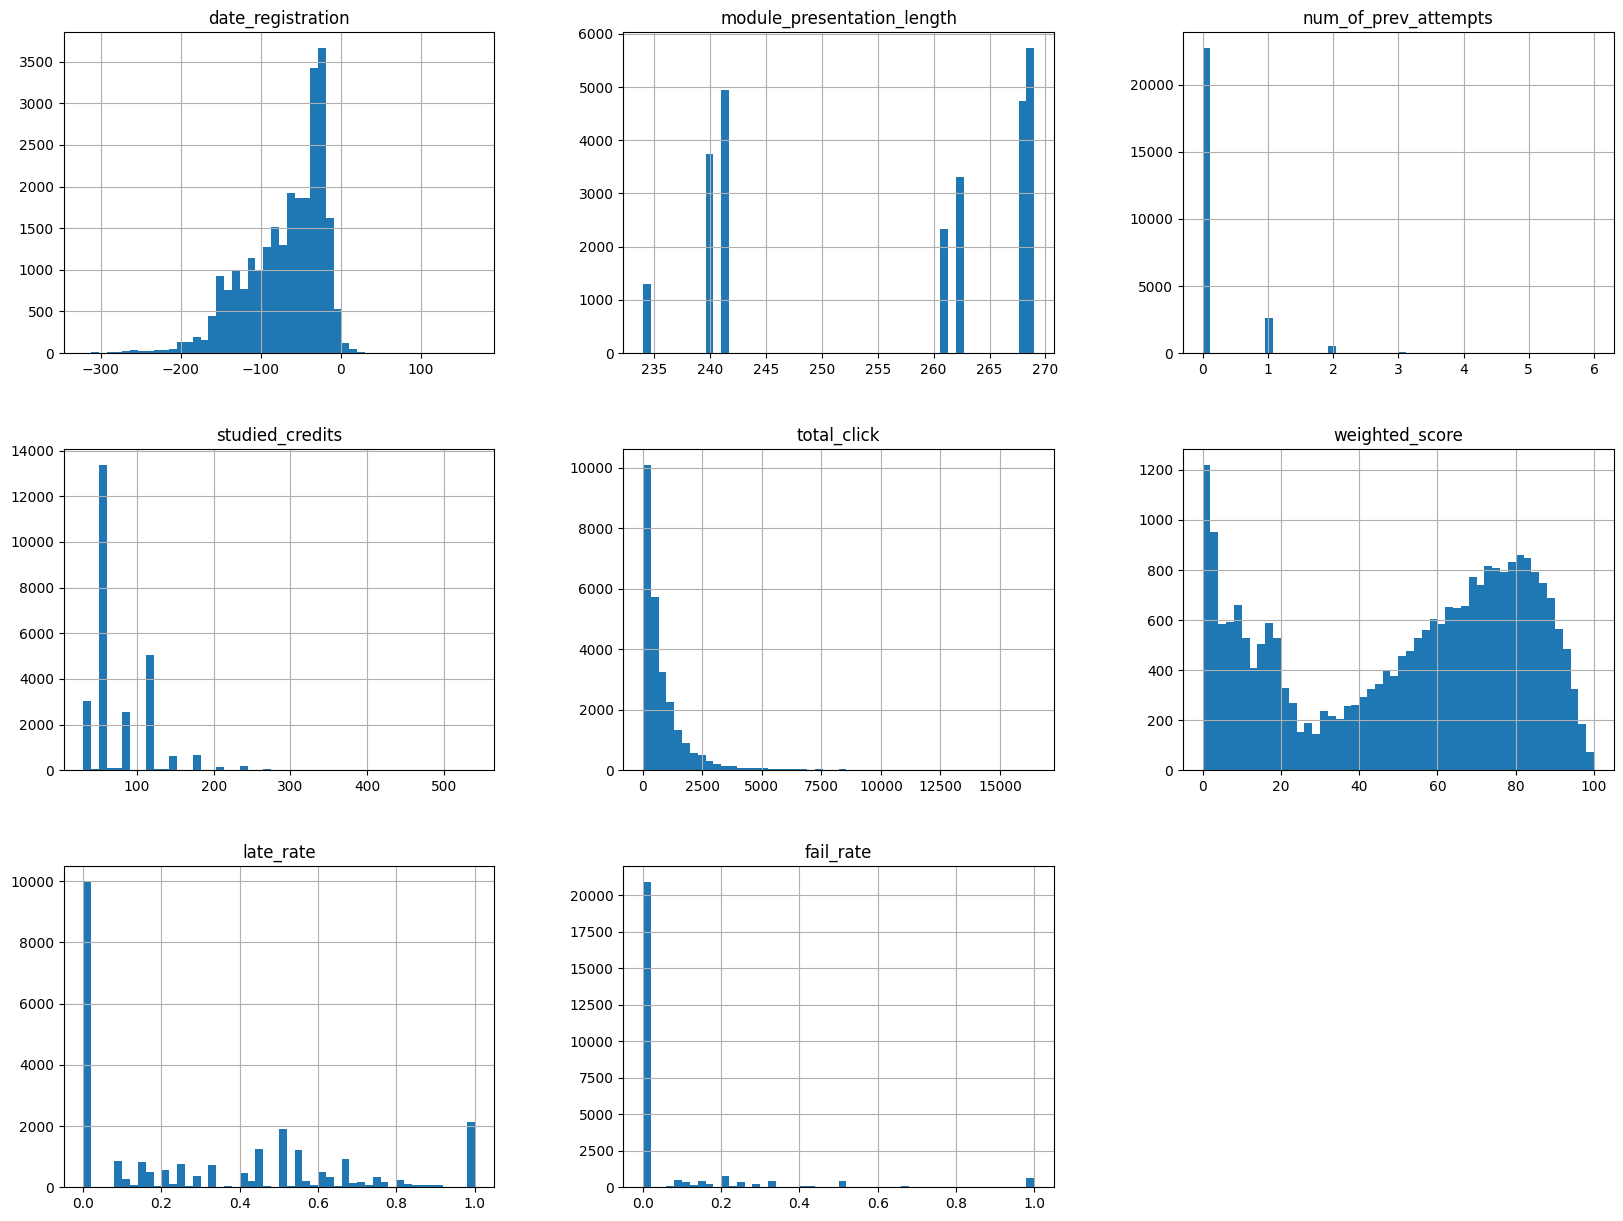

In [74]:
train.hist(bins=50, figsize=(20,15))
plt.show()

Target Variable - weighted_score

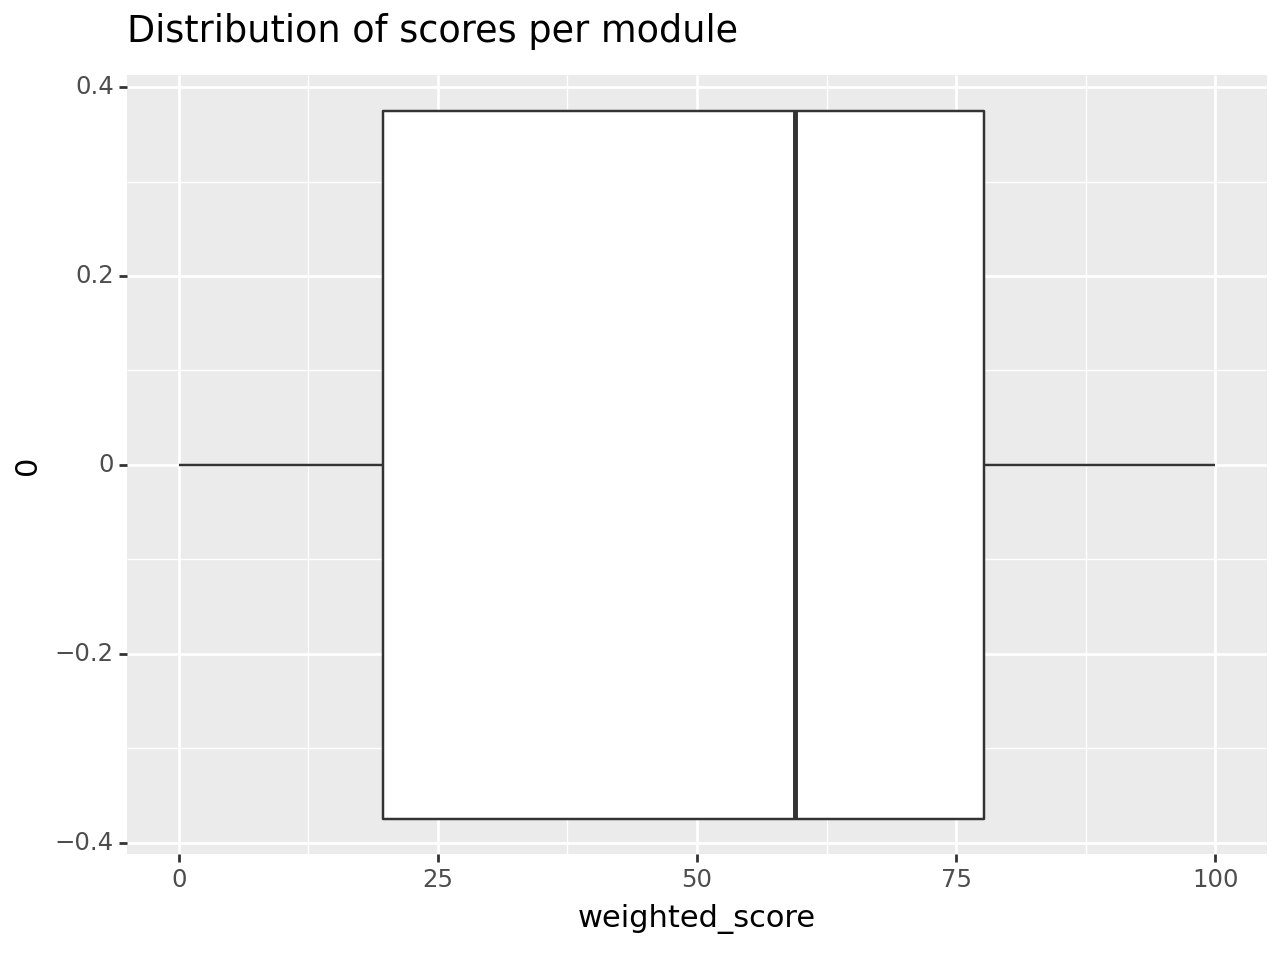

<Figure Size: (640 x 480)>

In [75]:
from plotnine import ggplot, aes, geom_boxplot, ggtitle, coord_flip

(
    ggplot(train)
    + aes(x=0, y='weighted_score')
    + geom_boxplot(outlier_color='crimson')
    + ggtitle("Distribution of scores per module")
    + coord_flip()
)

We can see the target variable has two peaks and is not normally distributed, but it doesn't have any outliers. We may wish to transform the target at some point to improve our models. This notebook shows very basic analysis though, so we will not be doing this, but it's something to keep in mind when using certain models (like the linear regression that assumes the distributions are normal).

**Correlation Matrix**

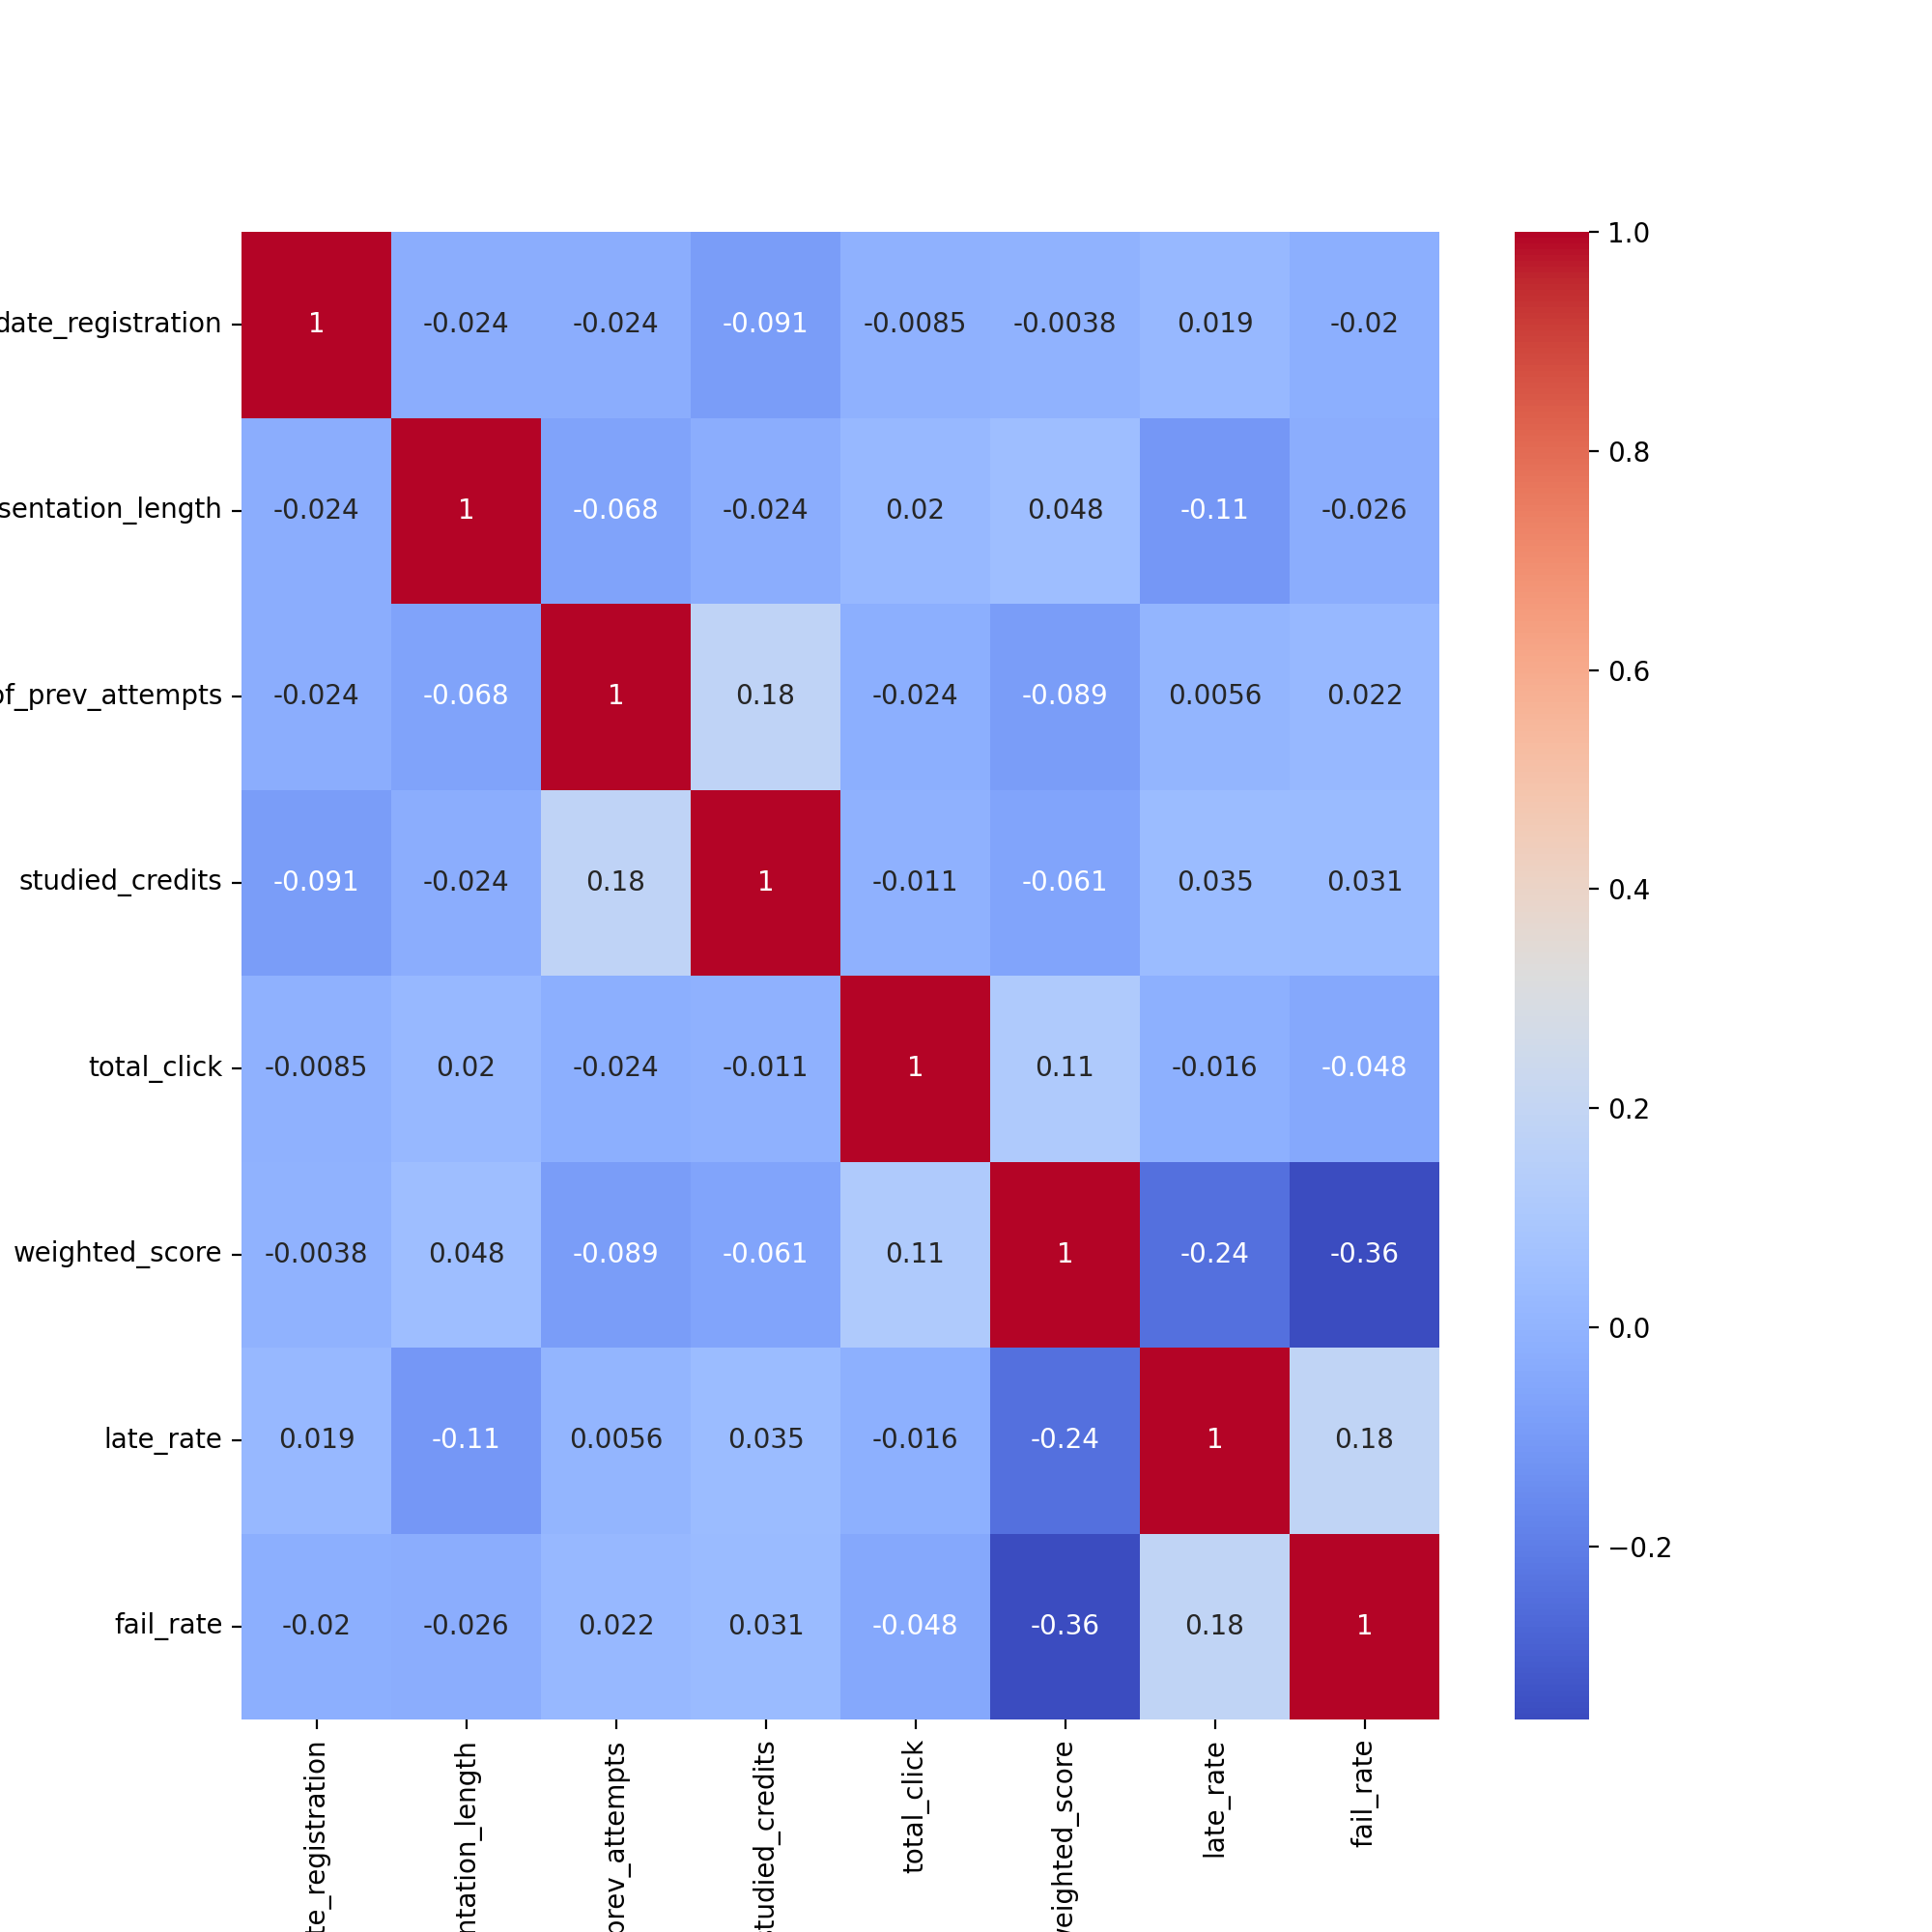

In [76]:
# Let's make a correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df_num.corr(), annot=True, cmap="coolwarm", );

Univariate analysis : Categorical data

In [77]:
train.head()

code_module code_presentation  date_registration  \
16563         DDD             2014B              -36.0   
16006         DDD             2013J              -32.0   
12884         CCC             2014J              -21.0   
27781         FFF             2014J             -124.0   
25125         FFF             2013J             -114.0   

       module_presentation_length gender                region  \
16563                         241      F   East Anglian Region   
16006                         261      M              Scotland   
12884                         269      M          South Region   
27781                         269      M  West Midlands Region   
25125                         268      M     South East Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
16563  A Level or Equivalent   50-60%     0-35                     1   
16006  A Level or Equivalent   20-30%     0-35                     0   
12884       HE Qualification   70-80%     55<=                     0   
27781     Lower Than A Level    10-20     0-35                     0   
25125     Lower Than A Level    10-20    35-55                     0   

       studied_credits disability  total_click  weighted_score  late_rate  \
16563               70          N          0.0         64.9125   0.142857   
16006              120          N          0.0         14.8625   0.000000   
12884               60          N          0.0         61.4300   0.875000   
27781               60          N          0.0         39.5000   0.181818   
25125               60          N          0.0          9.2500   0.000000   

       fail_rate  
16563        0.0  
16006        0.0  
12884        0.0  
27781        0.0  
25125        0.0

In [78]:
numerical_columns = ['weighted_score',  'total_click'  , 'module_presentation_length', 'date_registration',
                       'studied_credits', 'num_of_prev_attempts', 'late_rate', 'fail_rate'
]


df_num = train[numerical_columns]

# Print the DataFrame with categorical columns
print(df_num.head())

# Select specific categorical columns
categorical_columns = [
    'code_module', 'code_presentation', 'gender', 'region', 'imd_band',
    'highest_education', 'age_band', 'disability'
]

df_cat = train[categorical_columns]

# Print the DataFrame with categorical columns
df_cat.head()

       weighted_score  total_click  module_presentation_length  \
16563         64.9125          0.0                         241   
16006         14.8625          0.0                         261   
12884         61.4300          0.0                         269   
27781         39.5000          0.0                         269   
25125          9.2500          0.0                         268   

       date_registration  studied_credits  num_of_prev_attempts  late_rate  \
16563              -36.0               70                     1   0.142857   
16006              -32.0              120                     0   0.000000   
12884              -21.0               60                     0   0.875000   
27781             -124.0               60                     0   0.181818   
25125             -114.0               60                     0   0.000000   

       fail_rate  
16563        0.0  
16006        0.0  
12884        0.0  
27781        0.0  
25125        0.0  


code_module code_presentation gender                region imd_band  \
16563         DDD             2014B      F   East Anglian Region   50-60%   
16006         DDD             2013J      M              Scotland   20-30%   
12884         CCC             2014J      M          South Region   70-80%   
27781         FFF             2014J      M  West Midlands Region    10-20   
25125         FFF             2013J      M     South East Region    10-20   

           highest_education age_band disability  
16563  A Level or Equivalent     0-35          N  
16006  A Level or Equivalent     0-35          N  
12884       HE Qualification     55<=          N  
27781     Lower Than A Level     0-35          N  
25125     Lower Than A Level    35-55          N

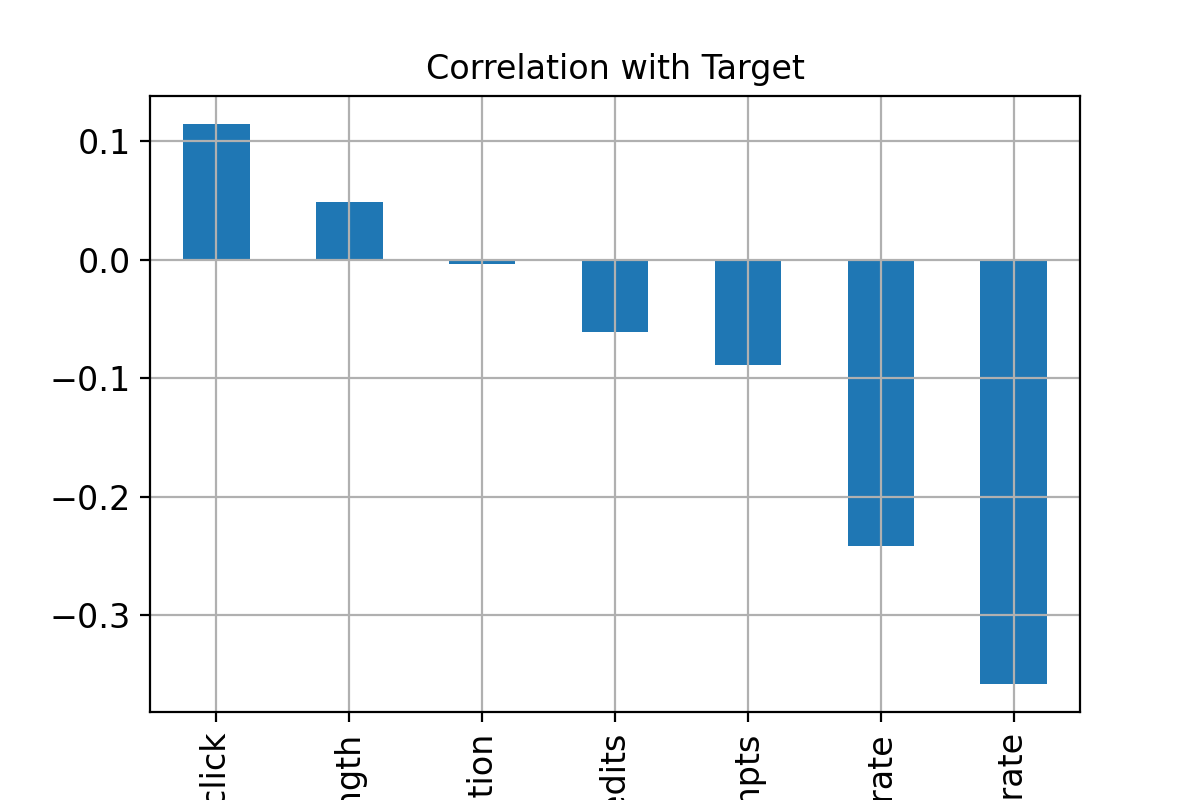

In [79]:
df_num\
.drop(columns=['weighted_score'])\
.corrwith(train['weighted_score']).plot.bar(
        figsize = (6, 4), title = "Correlation with Target", fontsize = 12,
        rot = 90, grid = True);

In [80]:
df_num.corrwith(train['weighted_score']).sort_values(ascending=False)

weighted_score                1.000000
total_click                   0.114282
module_presentation_length    0.048314
date_registration            -0.003783
studied_credits              -0.061500
num_of_prev_attempts         -0.088768
late_rate                    -0.241835
fail_rate                    -0.358006
dtype: float64

categorical data


In [81]:

df_cat.head()

code_module code_presentation gender                region imd_band  \
16563         DDD             2014B      F   East Anglian Region   50-60%   
16006         DDD             2013J      M              Scotland   20-30%   
12884         CCC             2014J      M          South Region   70-80%   
27781         FFF             2014J      M  West Midlands Region    10-20   
25125         FFF             2013J      M     South East Region    10-20   

           highest_education age_band disability  
16563  A Level or Equivalent     0-35          N  
16006  A Level or Equivalent     0-35          N  
12884       HE Qualification     55<=          N  
27781     Lower Than A Level     0-35          N  
25125     Lower Than A Level    35-55          N

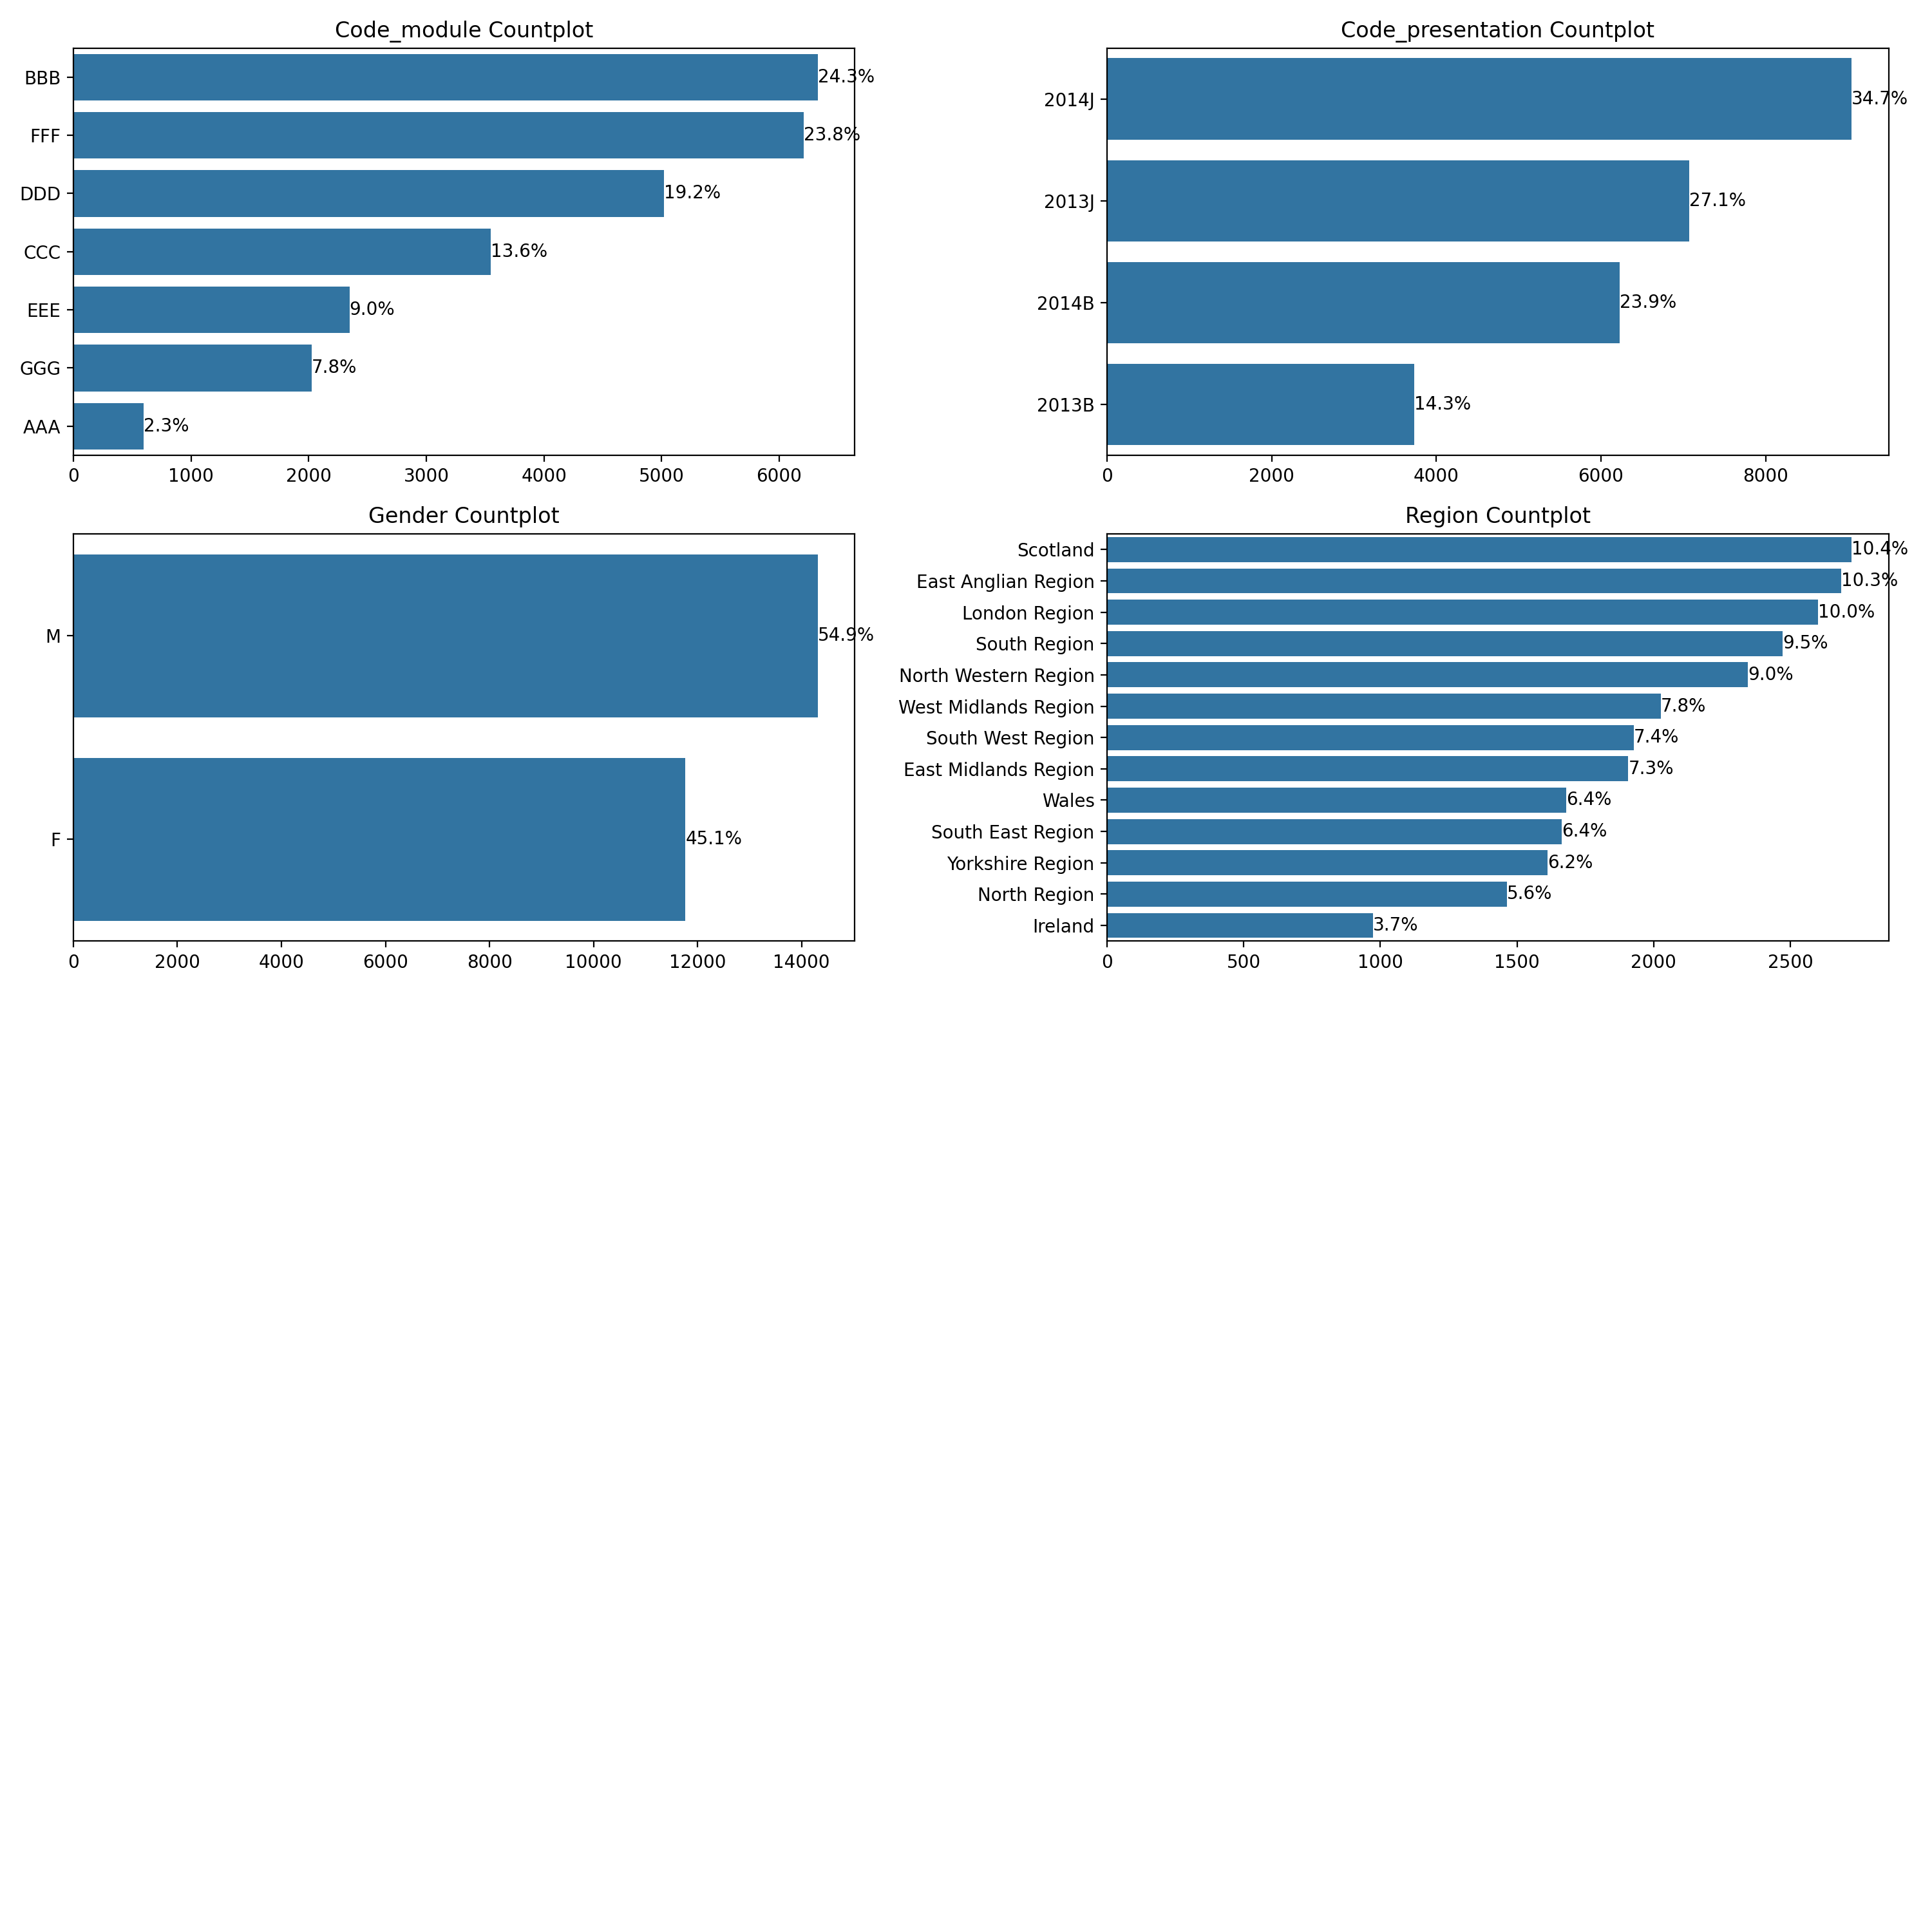

In [82]:
# Set the plot number for the first subplot function
plot_number = 1

# Set sizes for all plots
plt.figure(figsize=(15, 15)) # create a figure object
plt.subplots_adjust(hspace = 0.5) # set the size of subplots

for col in df_cat[['code_module', 'code_presentation', 'gender', 'region']]:
    # Call countplot on each column
    plt.subplot(4, 2, plot_number)
    sns.countplot(
        y=col,
        data=df_cat,
        order=df_cat[col].value_counts().index
    )
    plt.title(f'{col.capitalize()} Countplot')
    plt.xlabel('')
    plt.ylabel('')

    plot_number = plot_number + 1 # set a new plot number for the next subplot function
    # Add relative frequency labels:
    n_points = df_cat.shape[0]
    col_counts = df_cat[col].value_counts()
    locs, labels = plt.yticks()   # get the current tick locations and labels

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = col_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)

        # print the annotation at the top of the bar
        plt.text(x=count, y=loc, s=pct_string, ha='left', va='center', color='k')
plt.tight_layout()



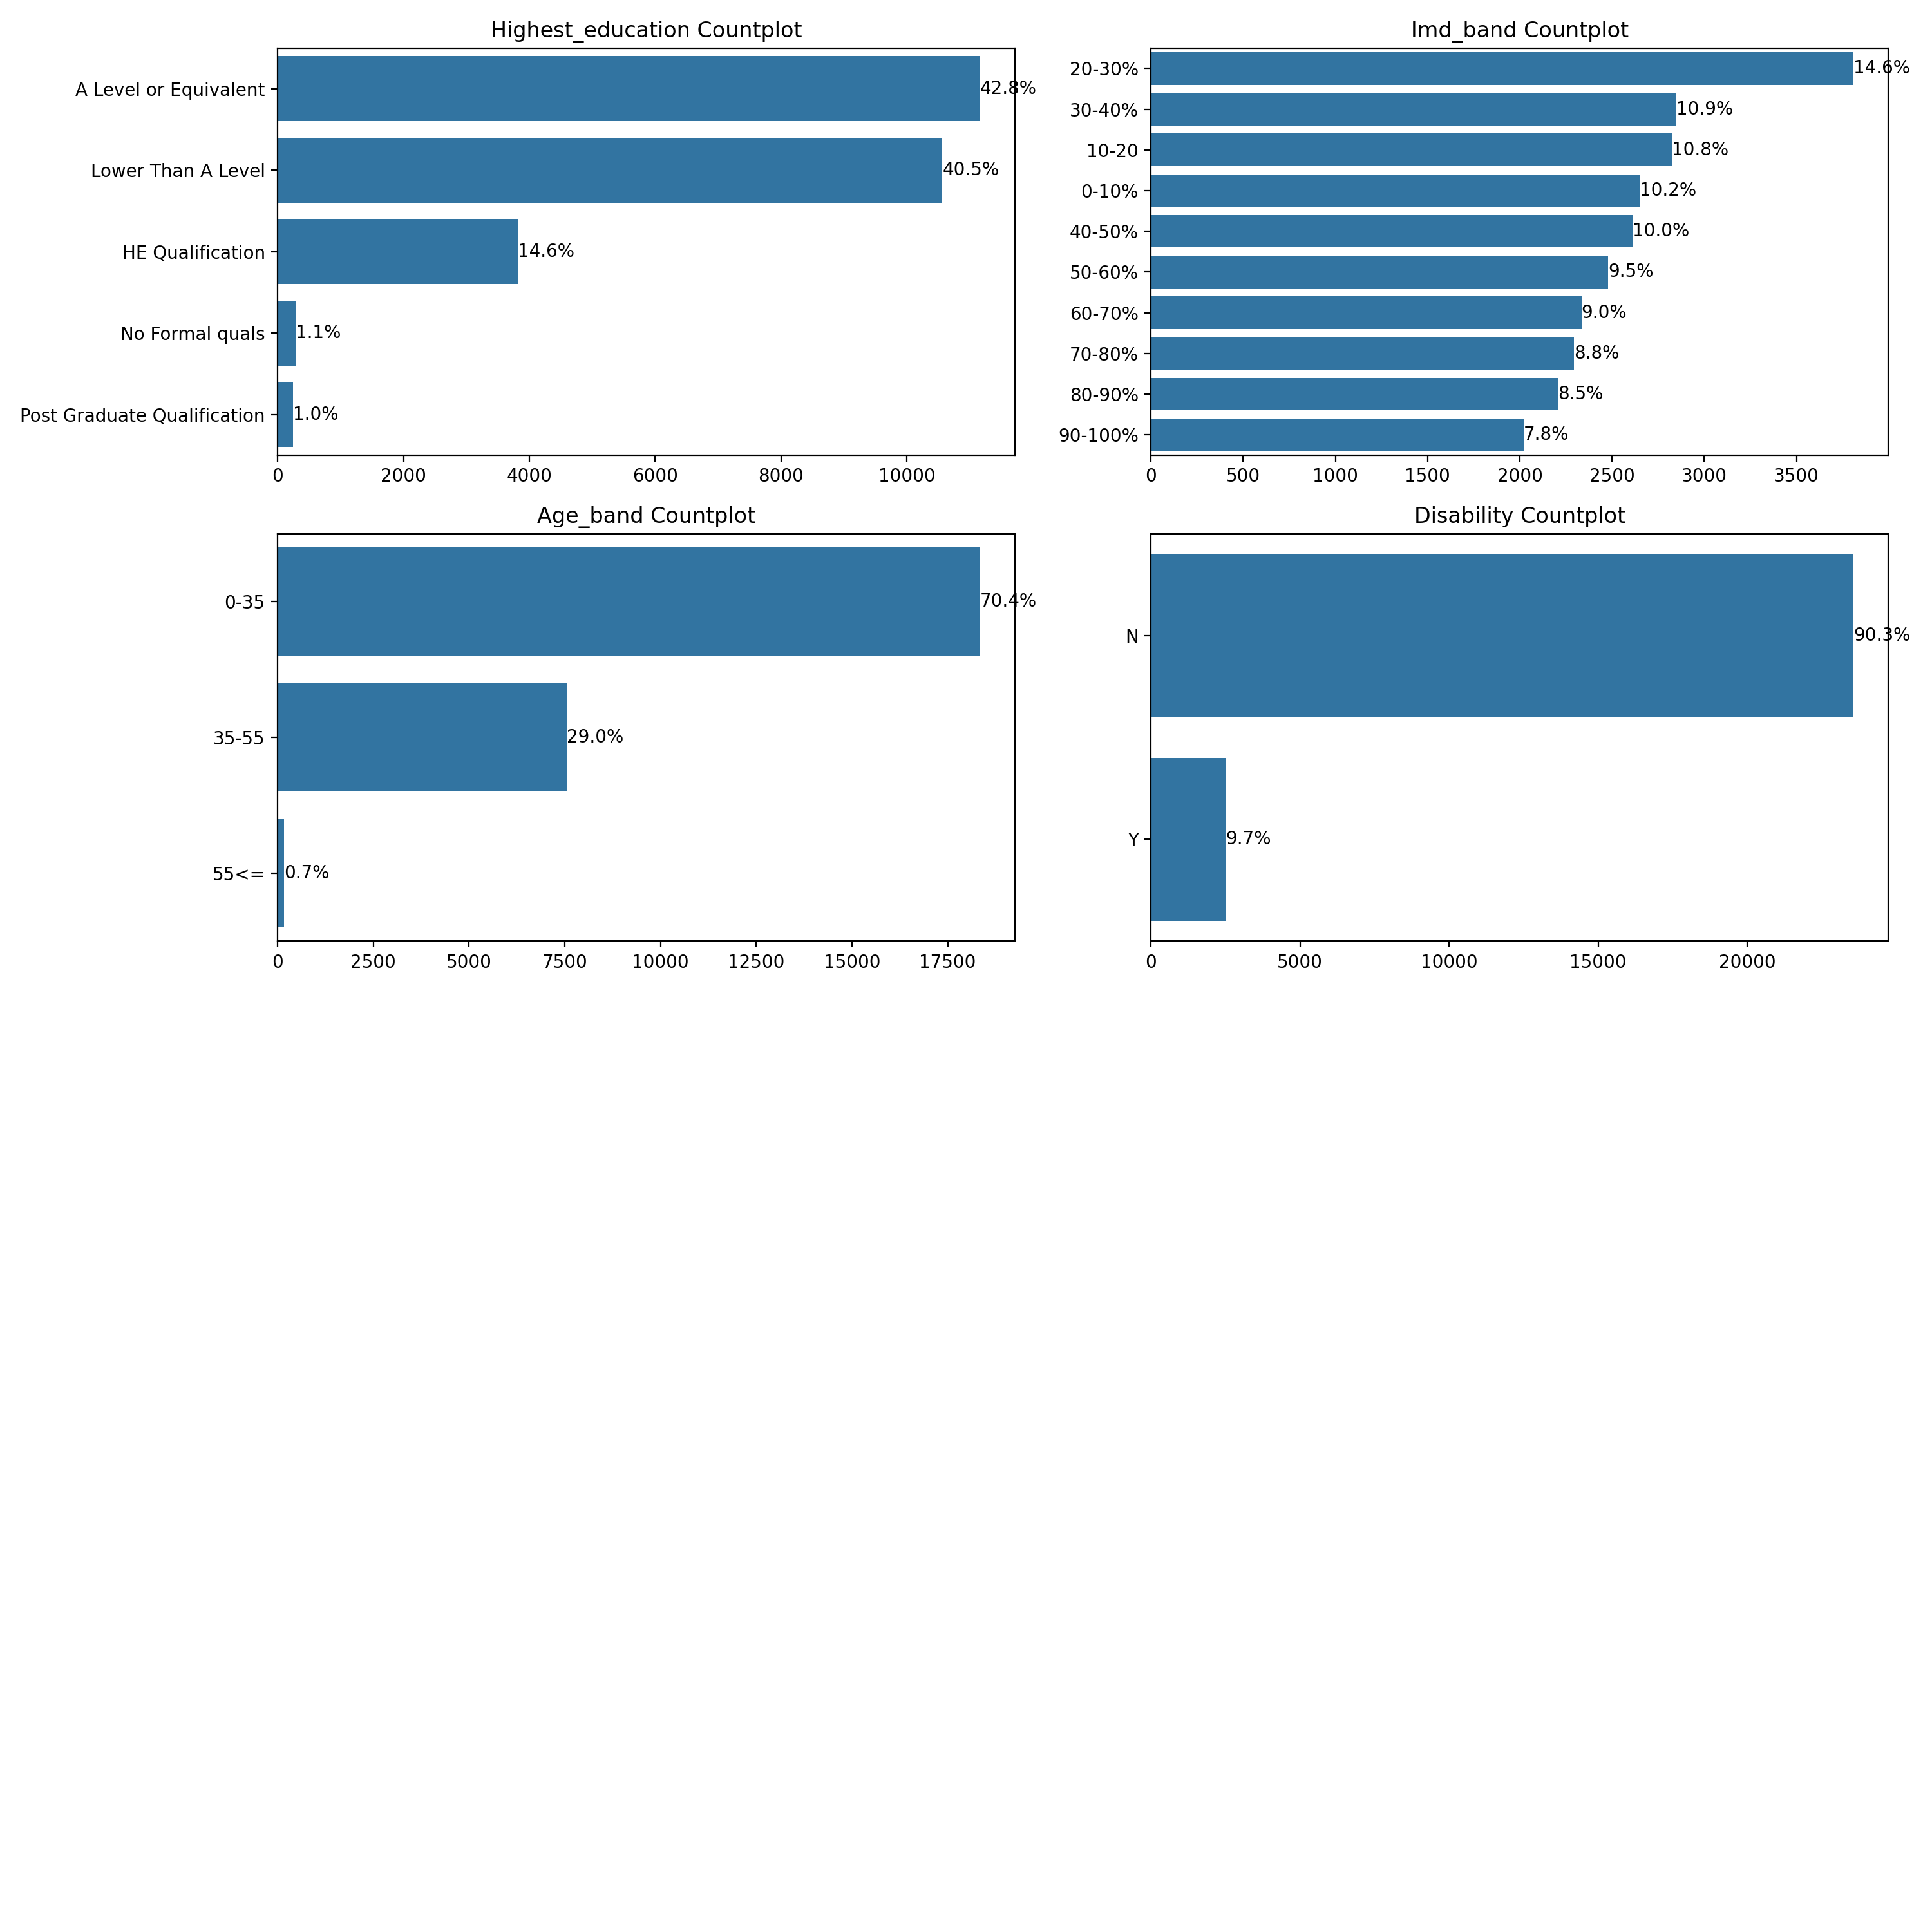

In [83]:
# Set the plot number for the first subplot function
plot_number = 1

# Set sizes for all plots
plt.figure(figsize=(15, 15)) # create a figure object
plt.subplots_adjust(hspace = 0.5) # set the size of subplots

for col in df_cat[['highest_education','imd_band', 'age_band', 'disability']]:
    # Call countplot on each column
    plt.subplot(4, 2, plot_number)
    sns.countplot(
        y=col,
        data=df_cat,
        order=df_cat[col].value_counts().index
    )
    plt.title(f'{col.capitalize()} Countplot')
    plt.xlabel('')
    plt.ylabel('')

    plot_number = plot_number + 1 # set a new plot number for the next subplot function
    # Add relative frequency labels:
    n_points = df_cat.shape[0]
    col_counts = df_cat[col].value_counts()
    locs, labels = plt.yticks()   # get the current tick locations and labels

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = col_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)

        # print the annotation at the top of the bar
        plt.text(x=count, y=loc, s=pct_string, ha='left', va='center', color='k')
plt.tight_layout()


Very few students with no formal education (1%)
Very few students with post-grad qualifications.
These two categories should be merged with 'Lower Than A Level' and 'HE Qualification', respectivelly, as with so little data these two categories are not likely to bring much insight.

Change education categories

In [84]:
# Rename 'no formal quals' into 'lower than a level'
train['highest_education'] = np.where( (train['highest_education'] == 'No Formal quals'),
                                           'Lower Than A Level',
                                           train['highest_education']
                                    )

# Rename post-grads
train['highest_education'] = np.where( (train['highest_education'] == 'Post Graduate Qualification'),
                                           'HE Qualification',
                                           train['highest_education']
                                    )


# Do the same for the test set
test['highest_education'] = np.where( (test['highest_education'] == 'No Formal quals'),
                                           'Lower Than A Level',
                                           test['highest_education']
                                    )

test['highest_education'] = np.where( (test['highest_education'] == 'Post Graduate Qualification'),
                                           'HE Qualification',
                                           test['highest_education']
                                    )

Change Age Categories

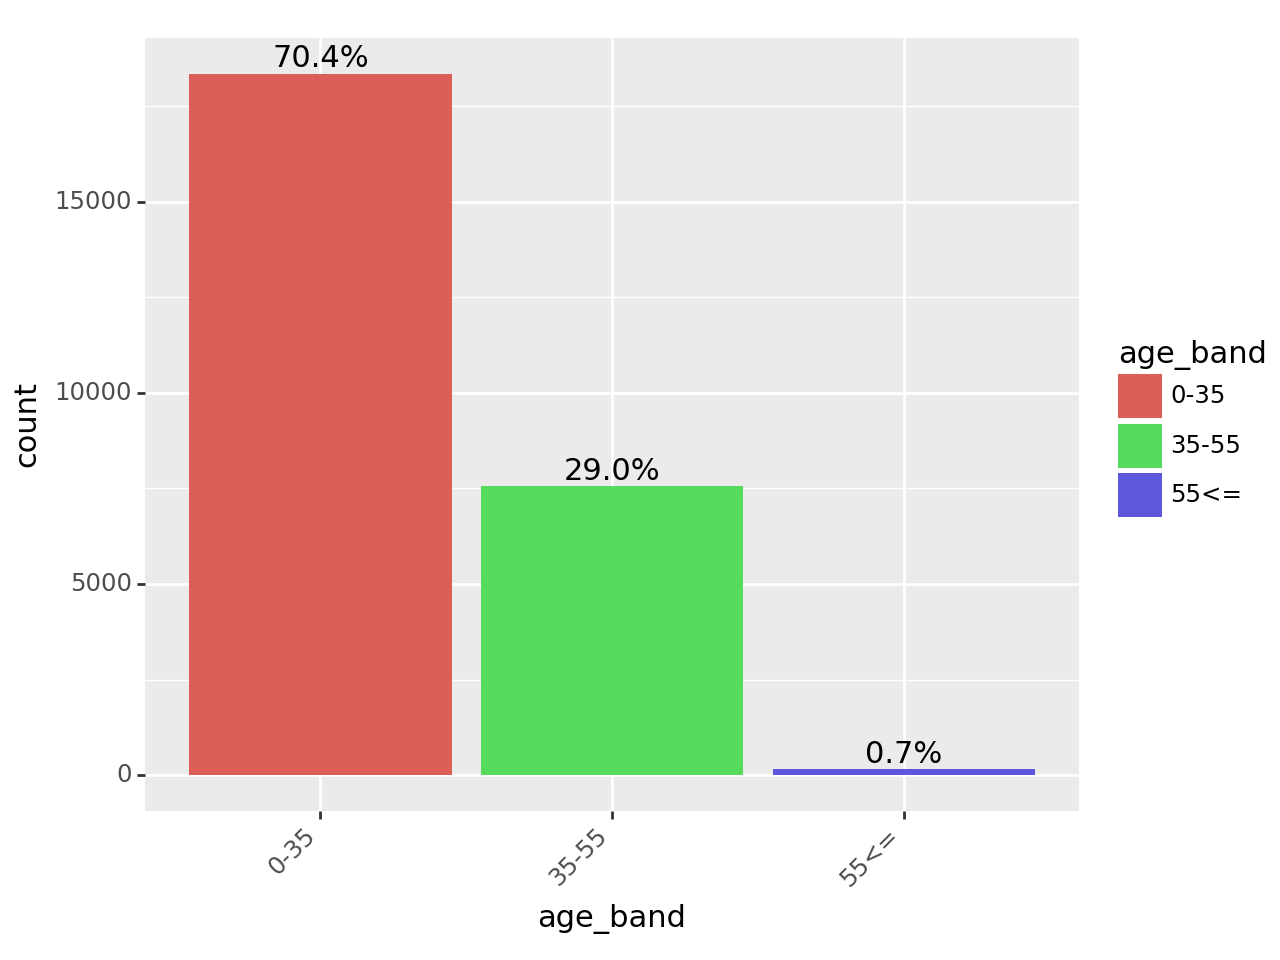

<Figure Size: (640 x 480)>

In [85]:
# Have a closer look at the category

from plotnine import geom_bar, geom_text, theme, element_text
(
    ggplot(train)
    + aes(x='age_band', fill='age_band')
    + geom_bar()
    + geom_text(
     aes(label='stat(prop)*100', group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'
)
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)


Now merge the least frequent categories

In [86]:
# Replace 55+ and 35-55 groups with 35+
train['age_band'] = np.where( (train['age_band'] == '55<='),
                                           '35+',
                                           train['age_band']
                                    )

train['age_band'] = np.where( (train['age_band'] == '35-55'),
                                           '35+',
                                           train['age_band']
                                    )

# Do the same for the test set
test['age_band'] = np.where( (test['age_band'] == '55<='),
                                           '35+',
                                           test['age_band']
                                    )

test['age_band'] = np.where( (test['age_band'] == '35-55'),
                                           '35+',
                                           test['age_band']
                                    )

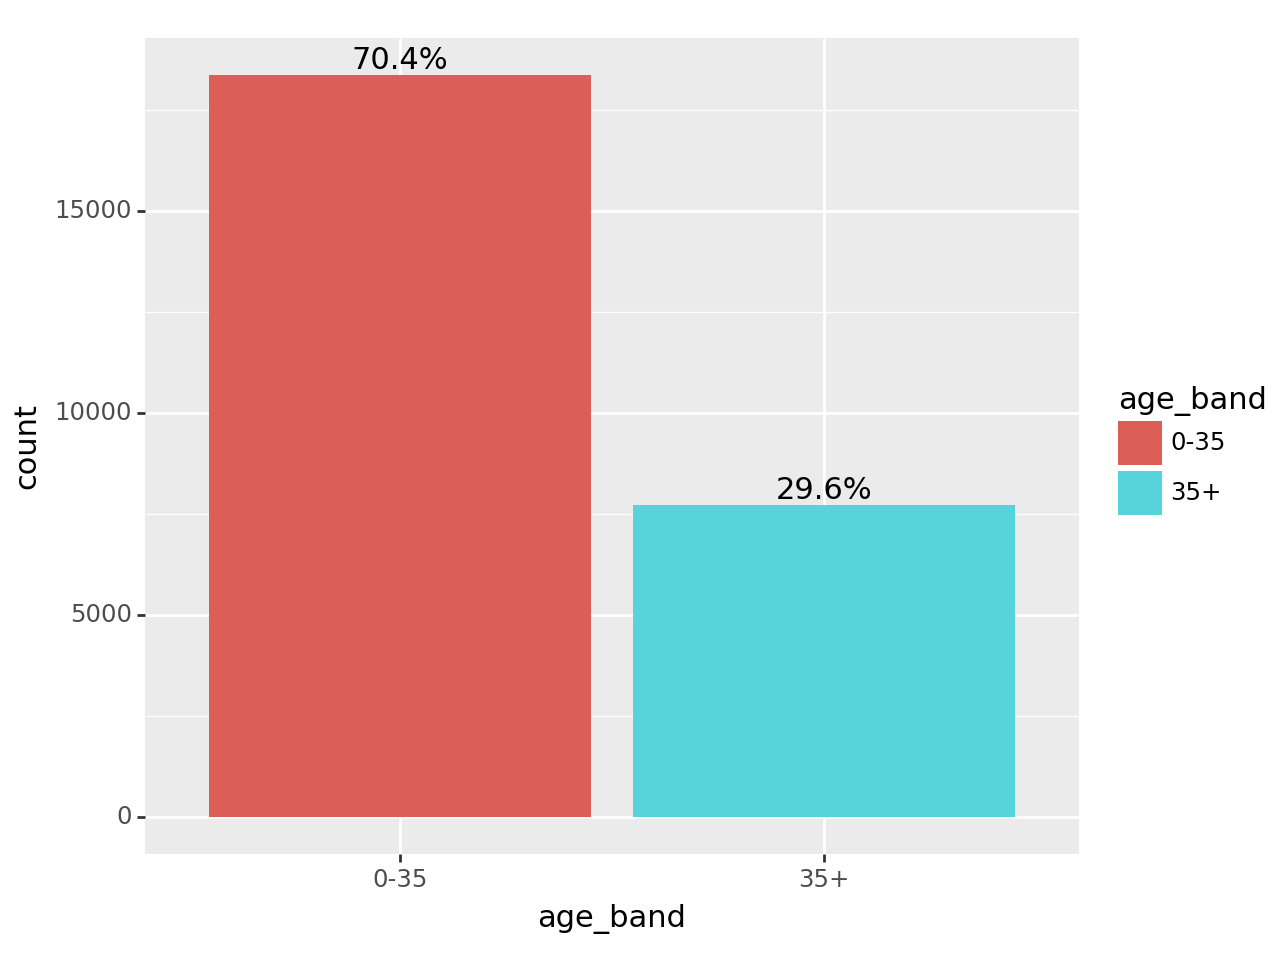

<Figure Size: (640 x 480)>

In [87]:
# See the changes
(
    ggplot(train)
    + aes(x='age_band', fill='age_band')
    + geom_bar()
    + geom_text(
     aes(label='stat(prop)*100', group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'
)
)

**Bivariate analysis**
final score vs other variables
numerical

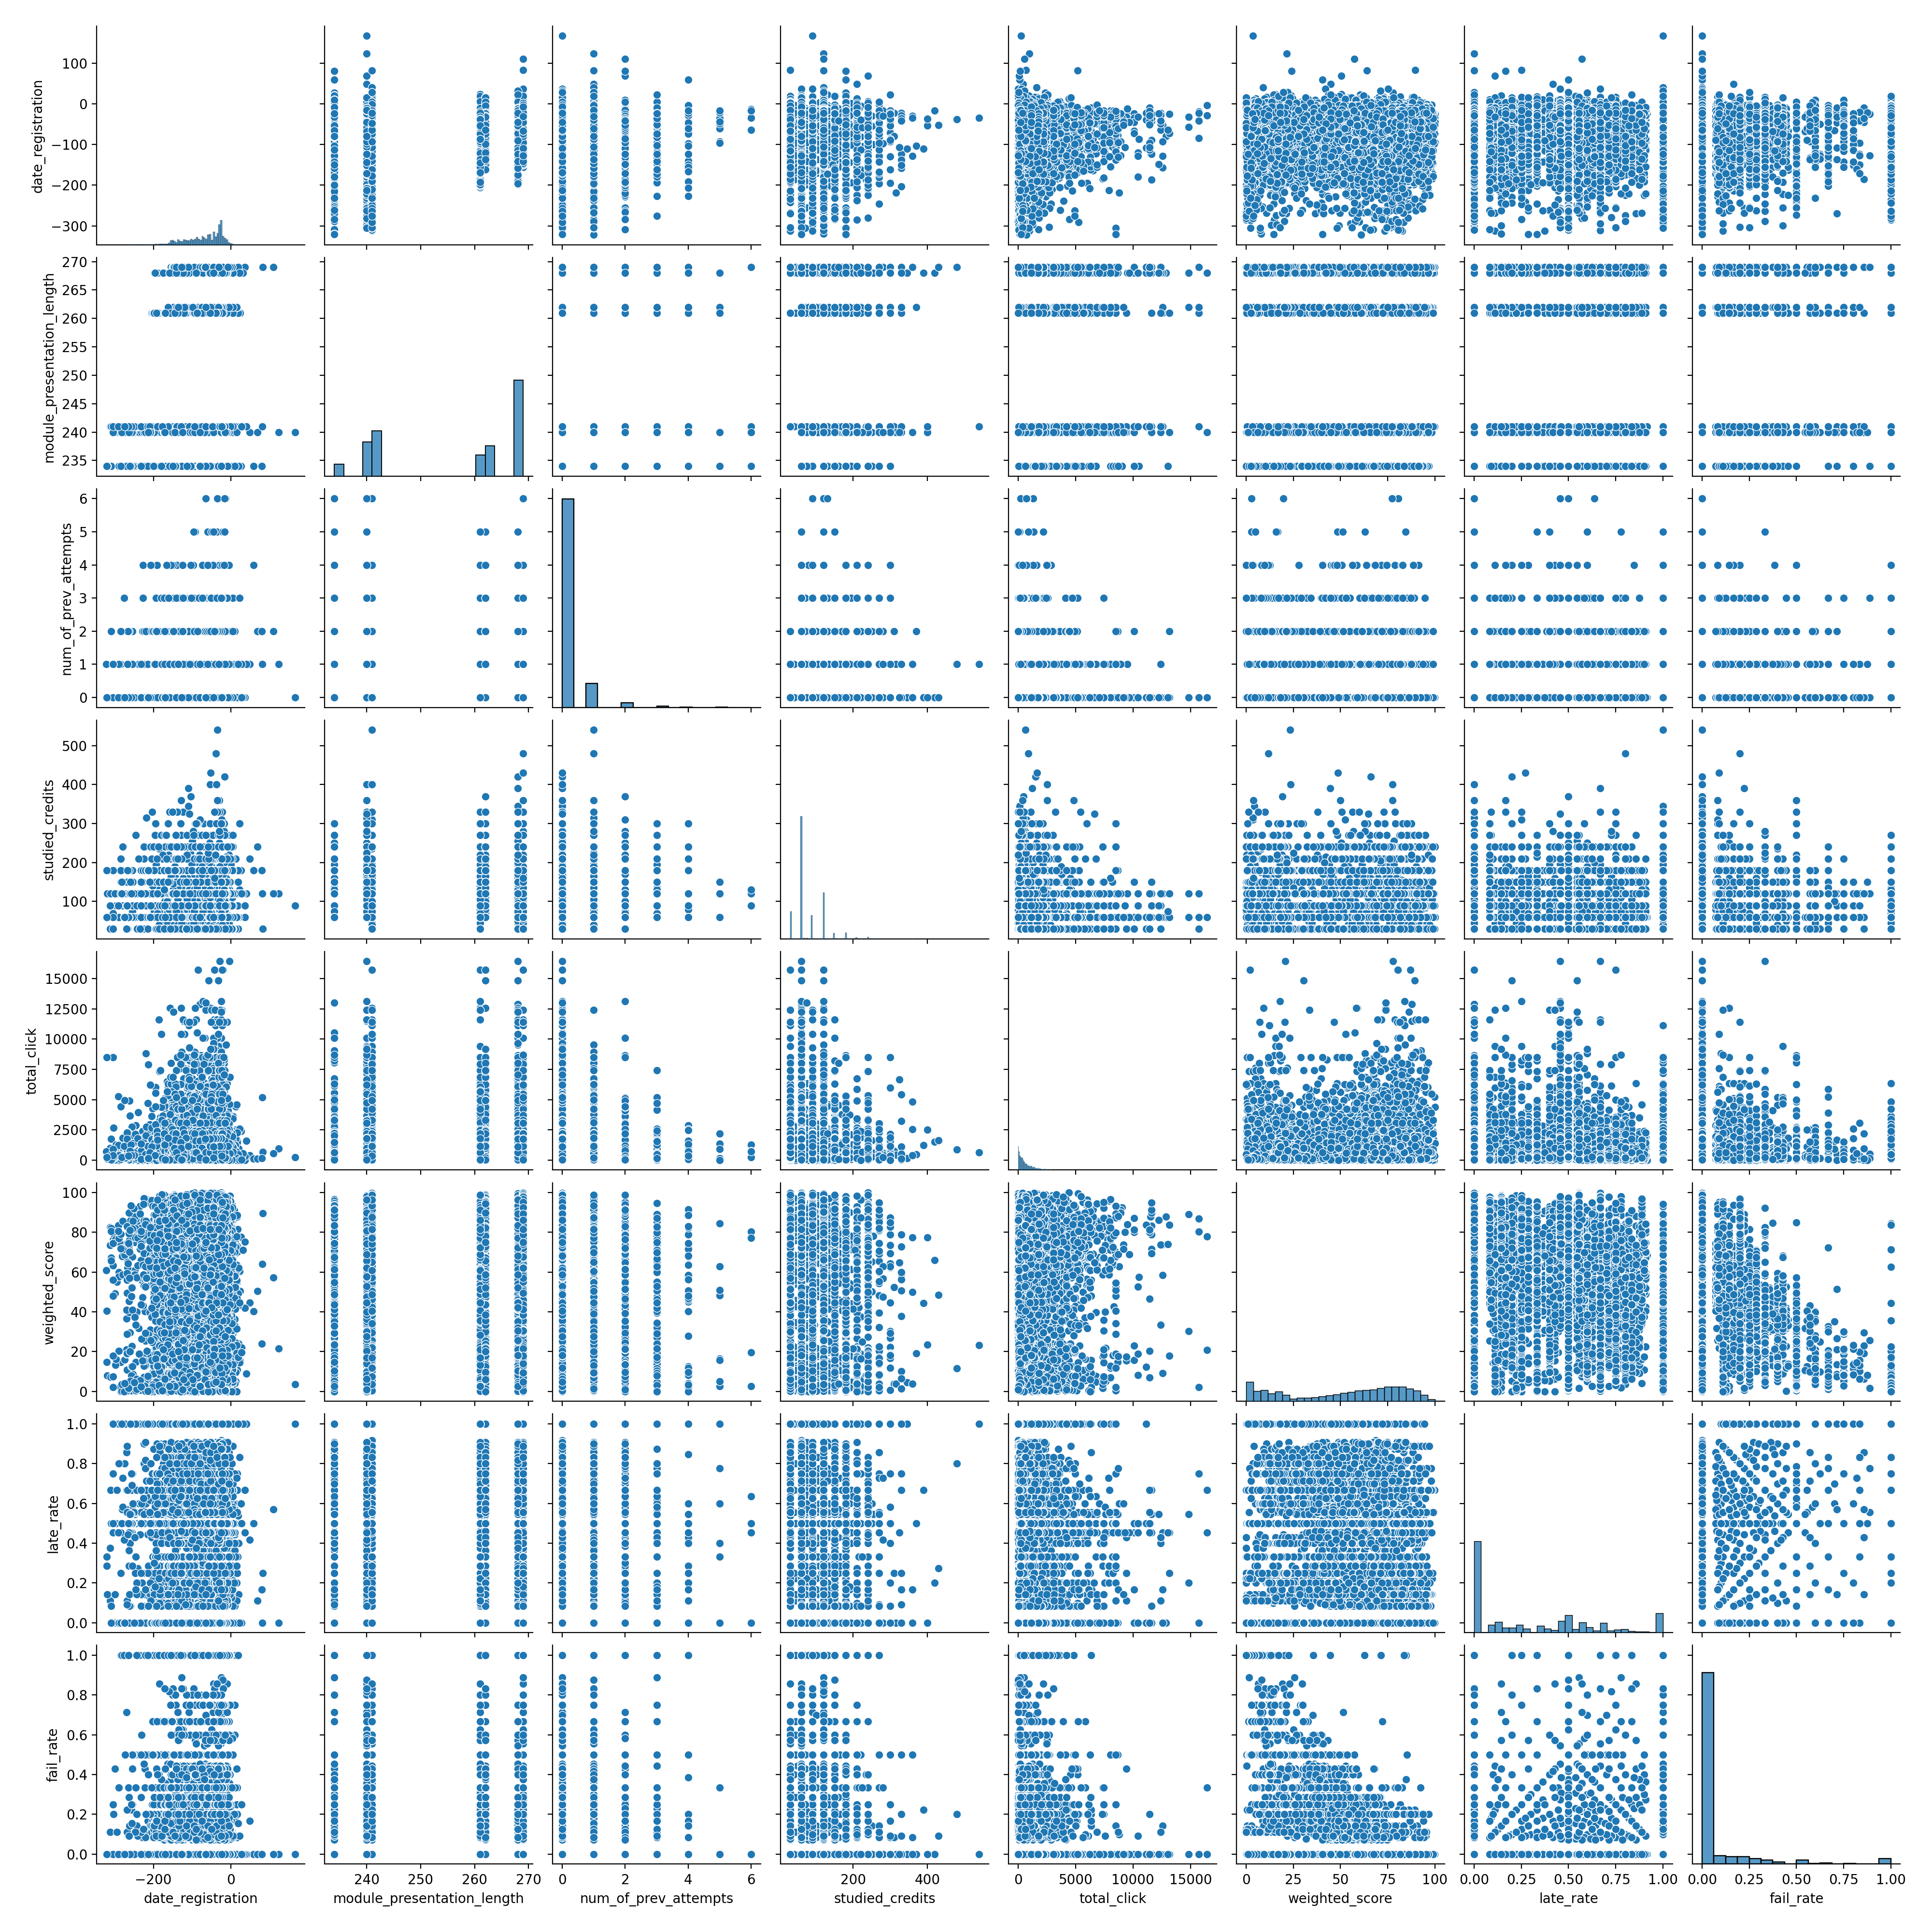

In [88]:
sns.pairplot(train)

categorical

In [89]:
train = train.assign(fail_final=train['weighted_score'] < 40)

train.head()

code_module code_presentation  date_registration  \
16563         DDD             2014B              -36.0   
16006         DDD             2013J              -32.0   
12884         CCC             2014J              -21.0   
27781         FFF             2014J             -124.0   
25125         FFF             2013J             -114.0   

       module_presentation_length gender                region  \
16563                         241      F   East Anglian Region   
16006                         261      M              Scotland   
12884                         269      M          South Region   
27781                         269      M  West Midlands Region   
25125                         268      M     South East Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
16563  A Level or Equivalent   50-60%     0-35                     1   
16006  A Level or Equivalent   20-30%     0-35                     0   
12884       HE Qualification   70-80%      35+                     0   
27781     Lower Than A Level    10-20     0-35                     0   
25125     Lower Than A Level    10-20      35+                     0   

       studied_credits disability  total_click  weighted_score  late_rate  \
16563               70          N          0.0         64.9125   0.142857   
16006              120          N          0.0         14.8625   0.000000   
12884               60          N          0.0         61.4300   0.875000   
27781               60          N          0.0         39.5000   0.181818   
25125               60          N          0.0          9.2500   0.000000   

       fail_rate  fail_final  
16563        0.0       False  
16006        0.0        True  
12884        0.0       False  
27781        0.0        True  
25125        0.0        True

Code_module


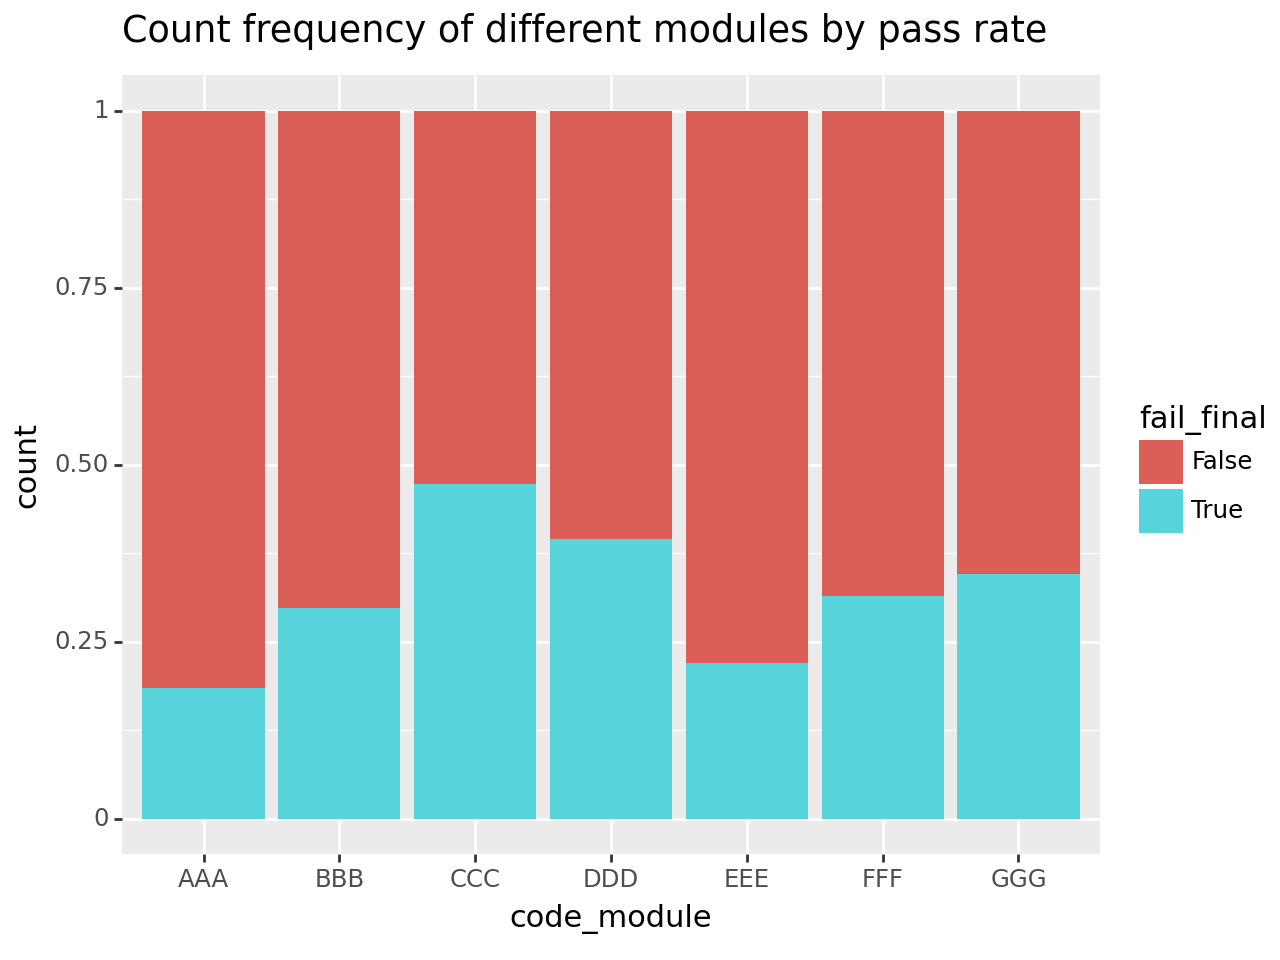

<Figure Size: (640 x 480)>

In [90]:
(
    ggplot(train)
    + aes(x='code_module', fill='fail_final')
    + geom_bar(position='fill')
    + ggtitle("Count frequency of different modules by pass rate")
)

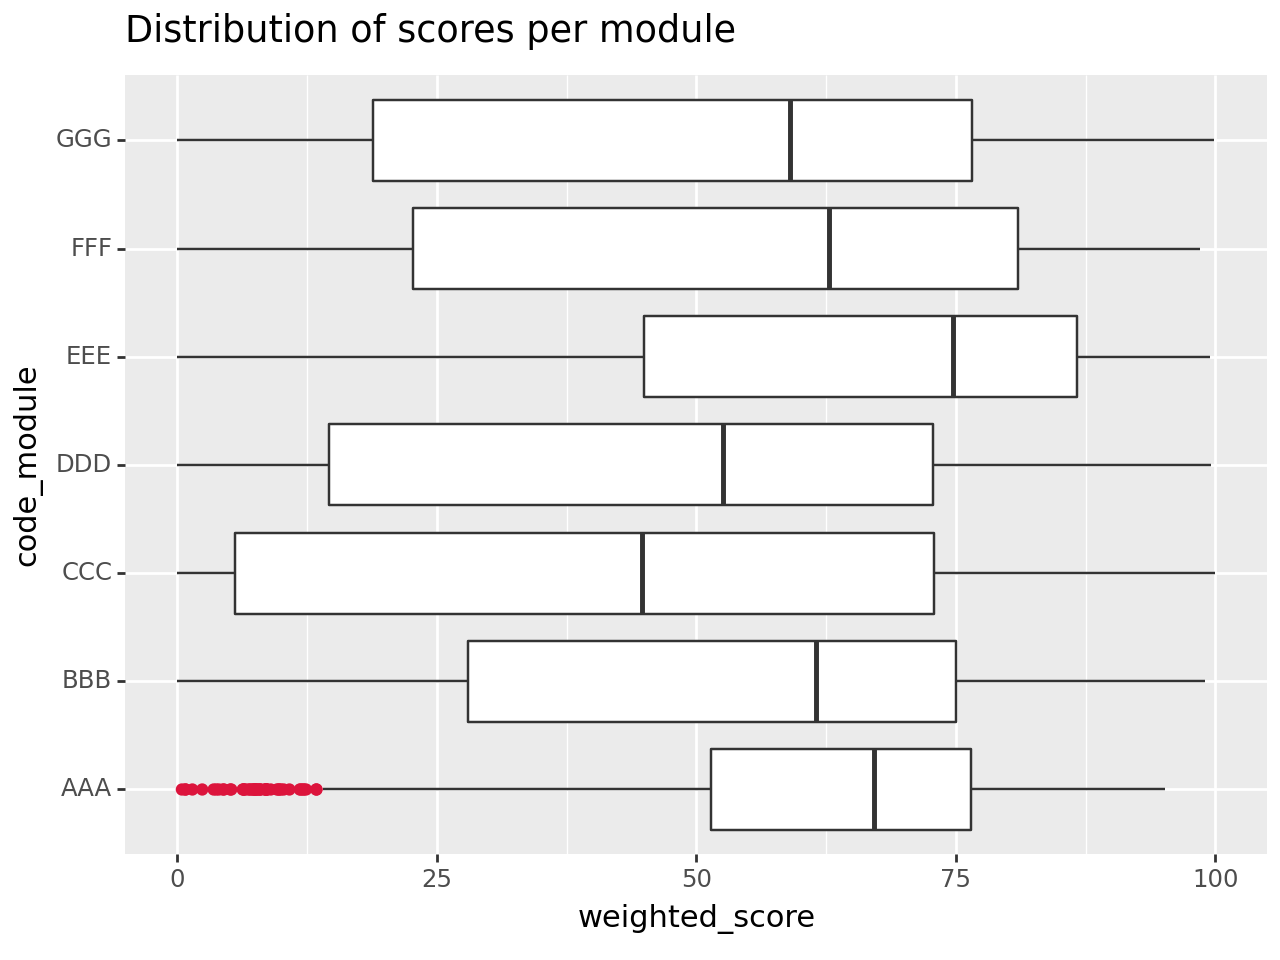

<Figure Size: (640 x 480)>

In [91]:
(
    ggplot(train)
    + aes('code_module', 'weighted_score')
    + geom_boxplot(outlier_color='crimson')
    + ggtitle("Distribution of scores per module")
    + coord_flip()
)

It seems that some modules have higher fail rates than others. For example, for module CCC the pass rate is just a little over 50%. The boxplot also reveals some outliers.

Code_presentation

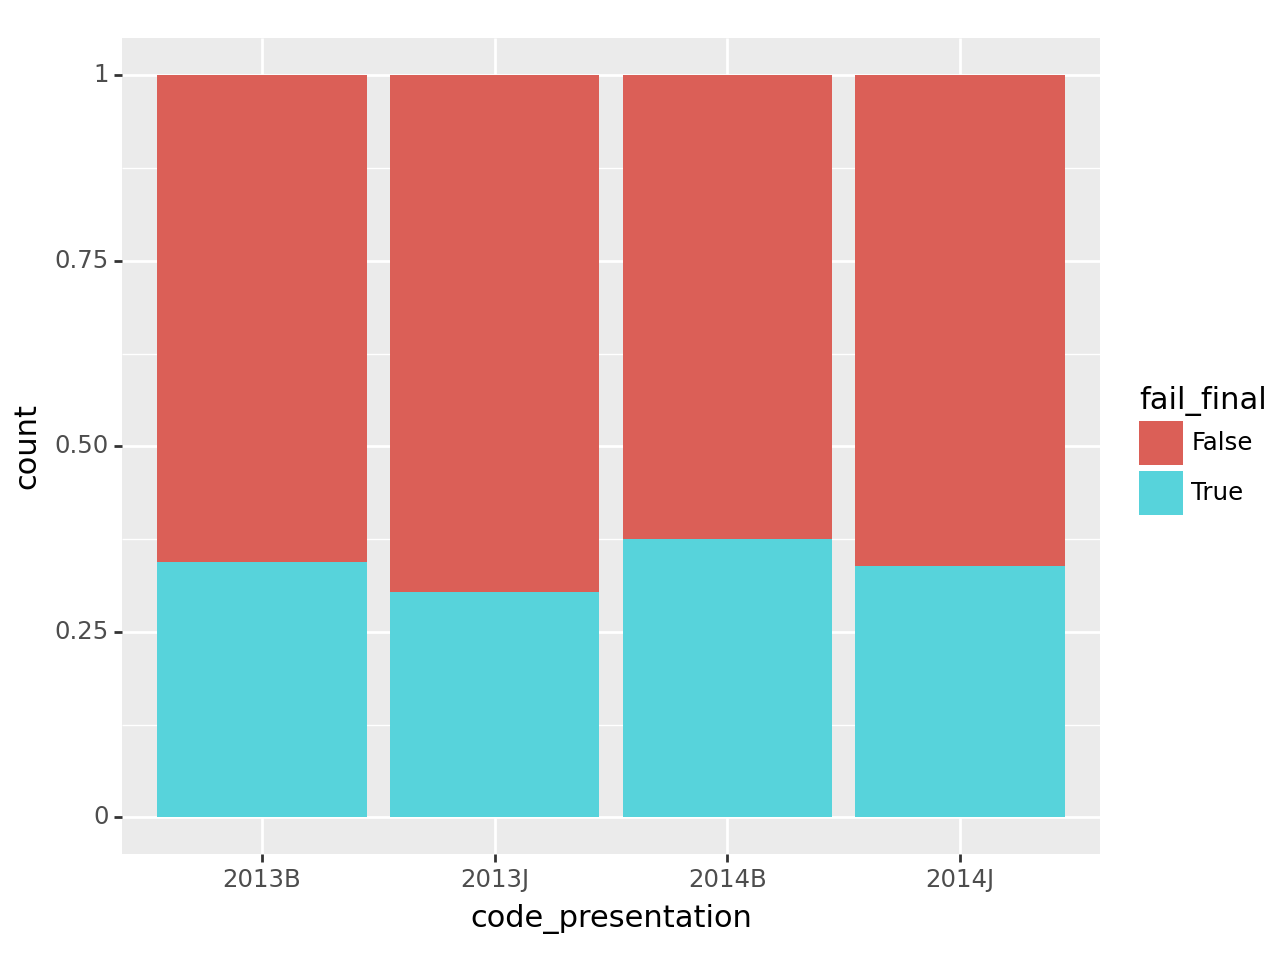

<Figure Size: (640 x 480)>

In [92]:
(
    ggplot(train)
    + aes(x='code_presentation', fill='fail_final')
    + geom_bar(position='fill')
)

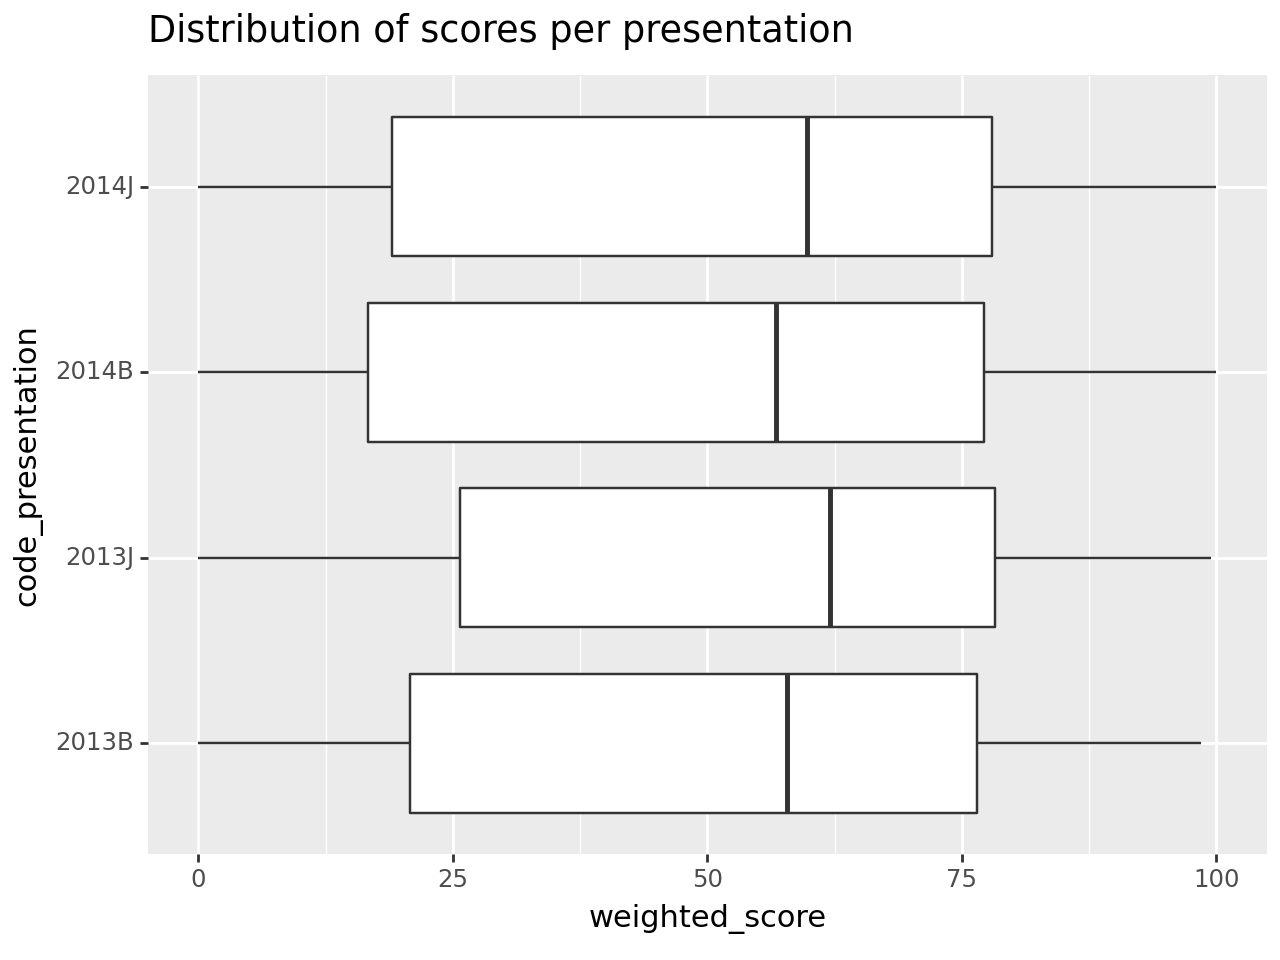

<Figure Size: (640 x 480)>

In [93]:
(
    ggplot(train)
    + aes('code_presentation', 'weighted_score')
    + geom_boxplot(outlier_color='crimson')
    + ggtitle("Distribution of scores per presentation")
    + coord_flip()
)

Gender


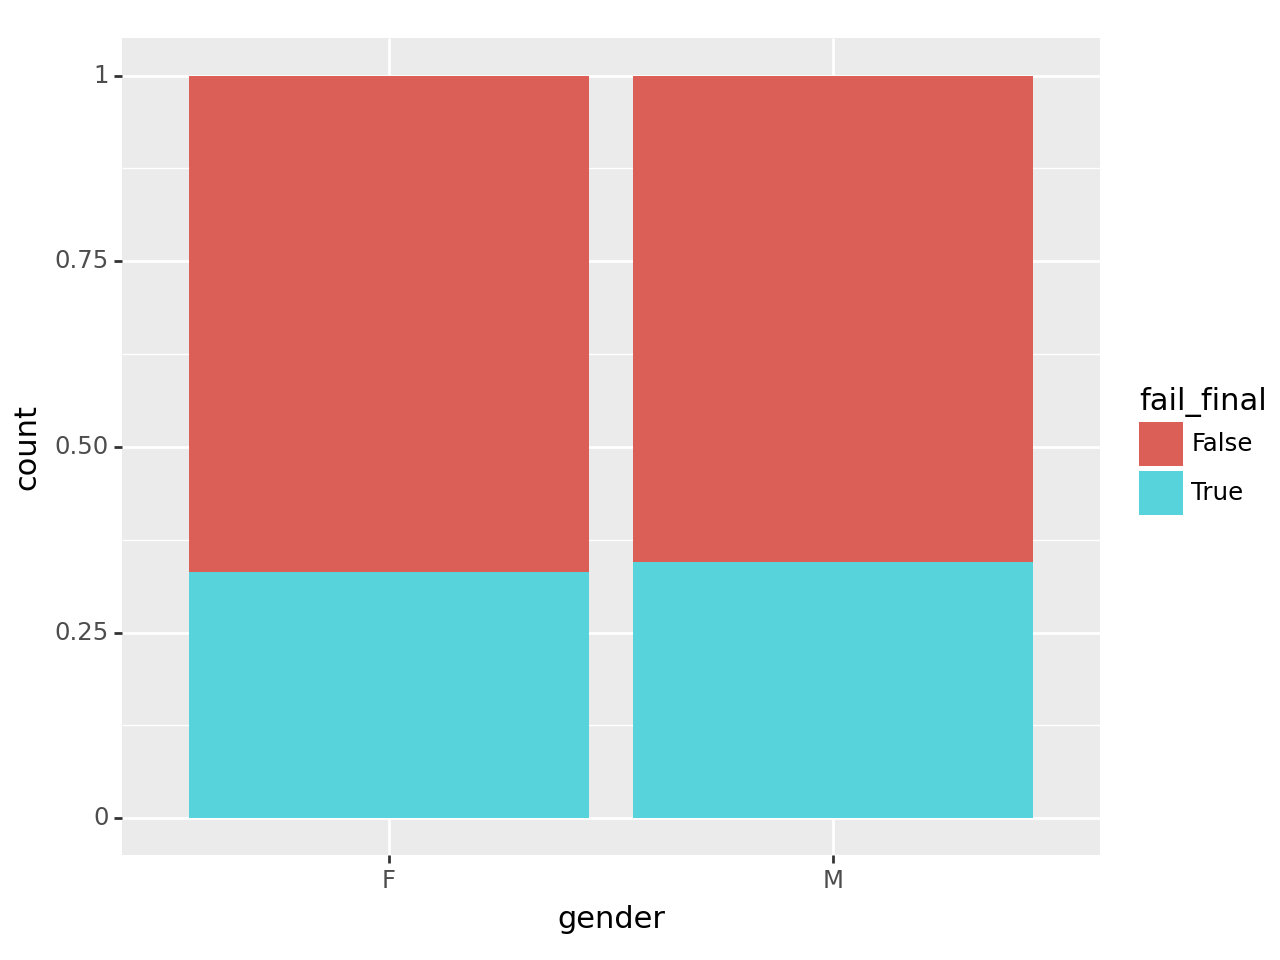

<Figure Size: (640 x 480)>

In [94]:
(
    ggplot(train)
    + aes(x='gender', fill='fail_final')
    + geom_bar(position='fill')
)

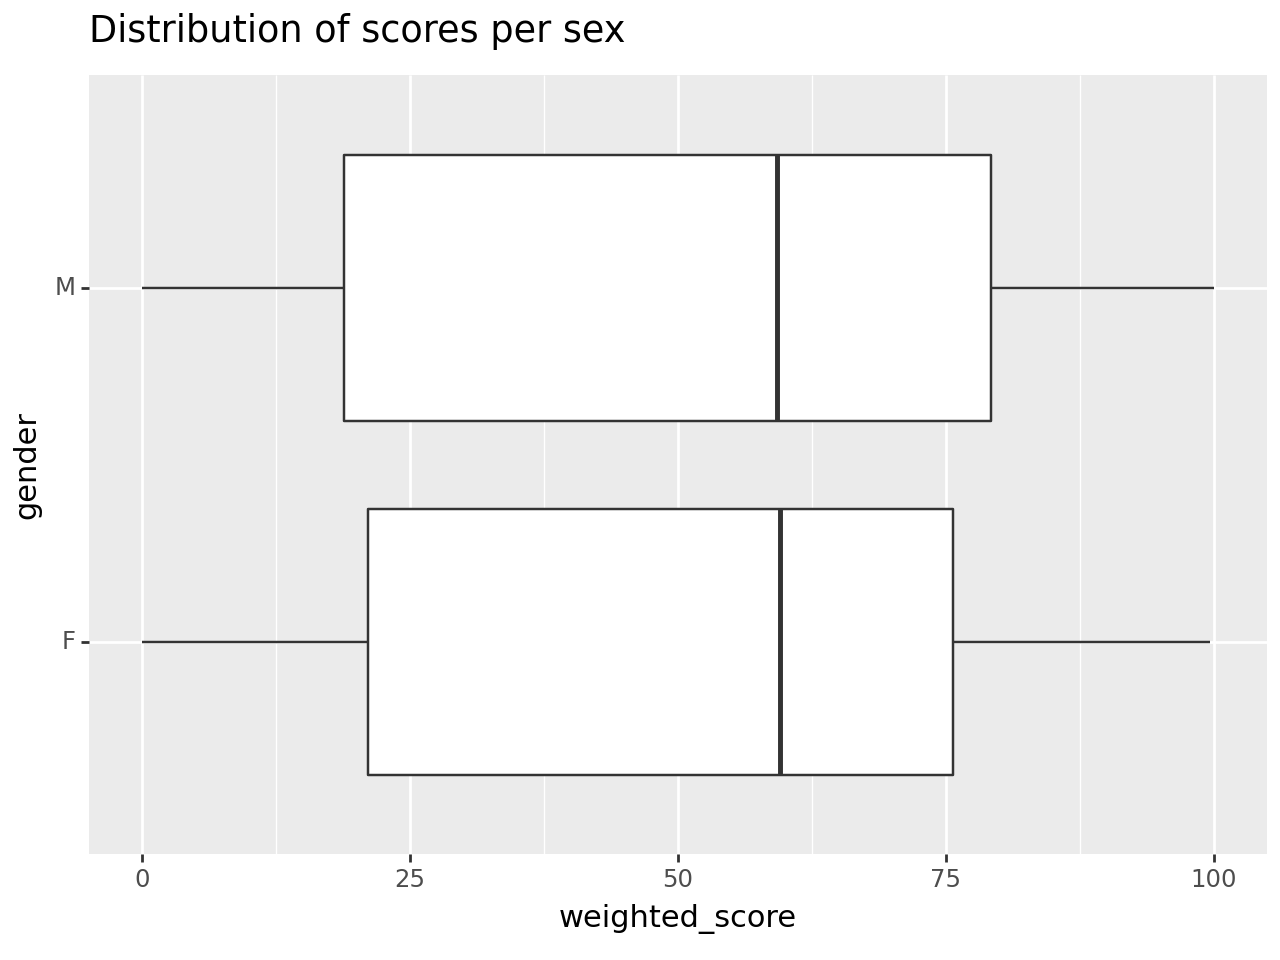

<Figure Size: (640 x 480)>

In [95]:
(
    ggplot(train)
    + aes('gender', 'weighted_score')
    + geom_boxplot(outlier_color='crimson')
    + ggtitle("Distribution of scores per sex")
    + coord_flip()
)

Region


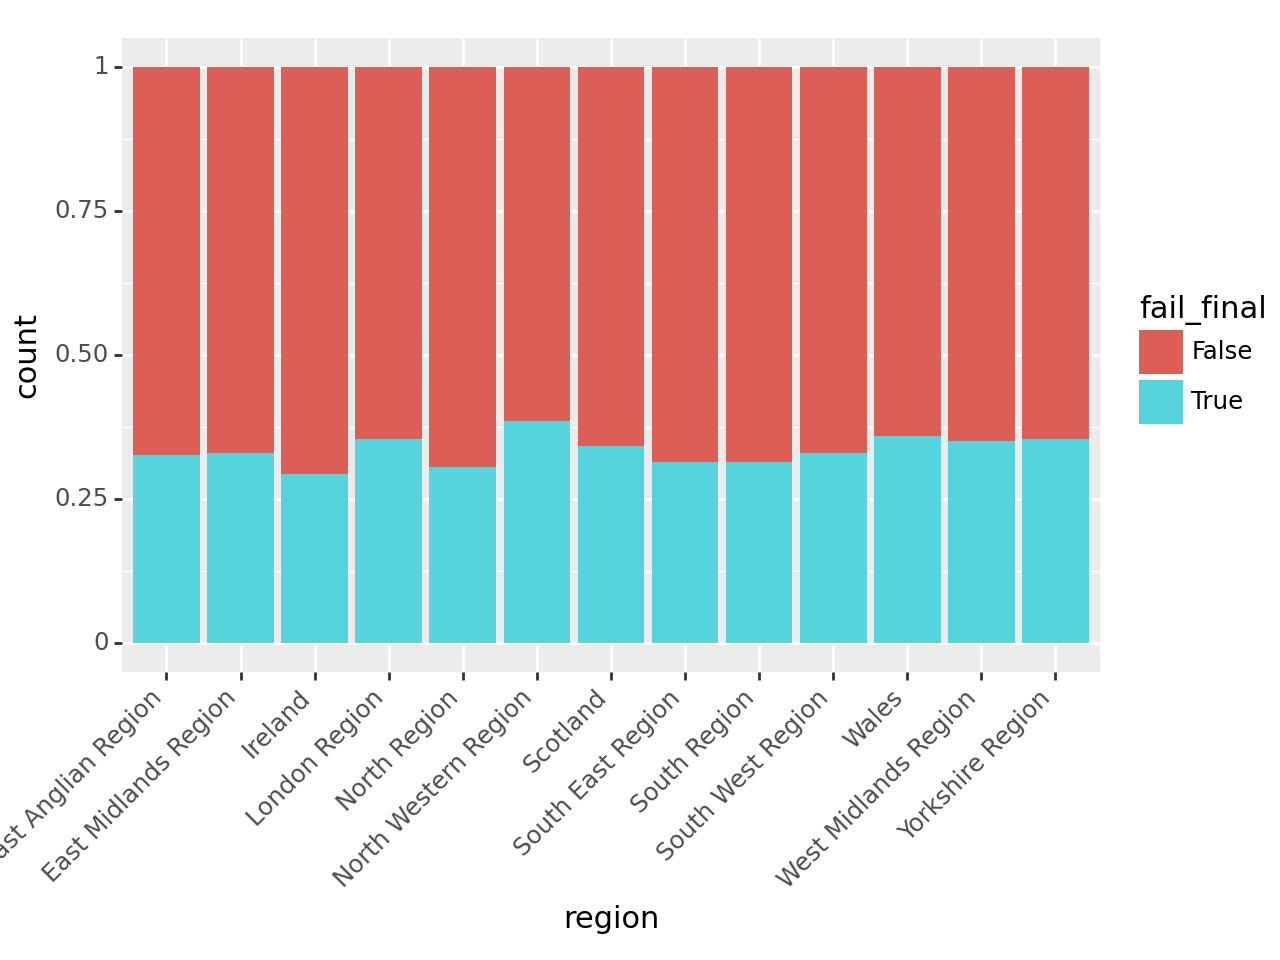

<Figure Size: (640 x 480)>

In [96]:
(
    ggplot(train)
    + aes(x='region', fill='fail_final')
    + geom_bar(position='fill')
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

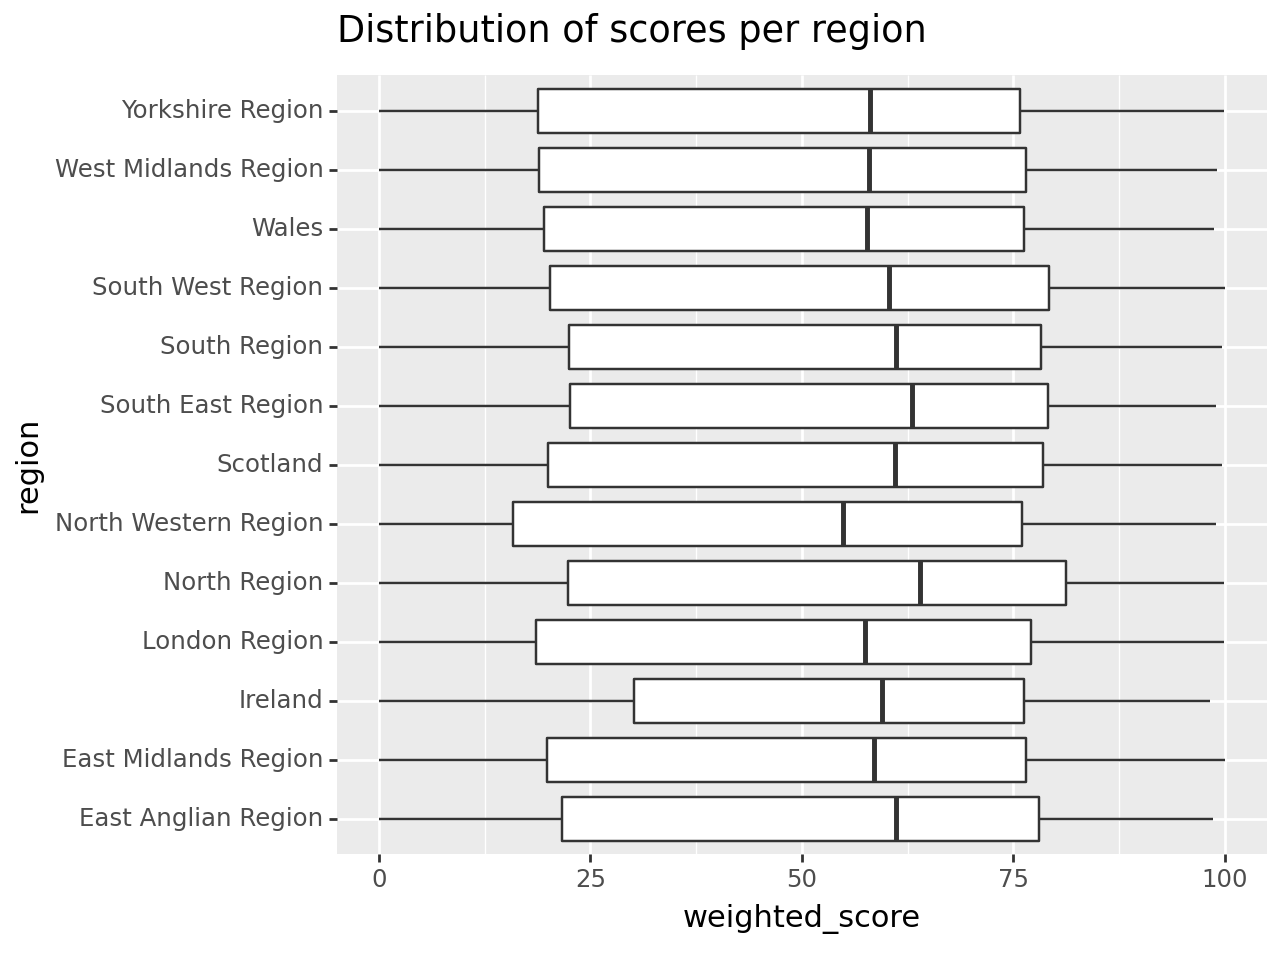

<Figure Size: (640 x 480)>

In [97]:
(
    ggplot(train)
    + aes('region', 'weighted_score')
    + geom_boxplot(outlier_color='crimson')
    + ggtitle("Distribution of scores per region")
    + coord_flip()
)

Highest education


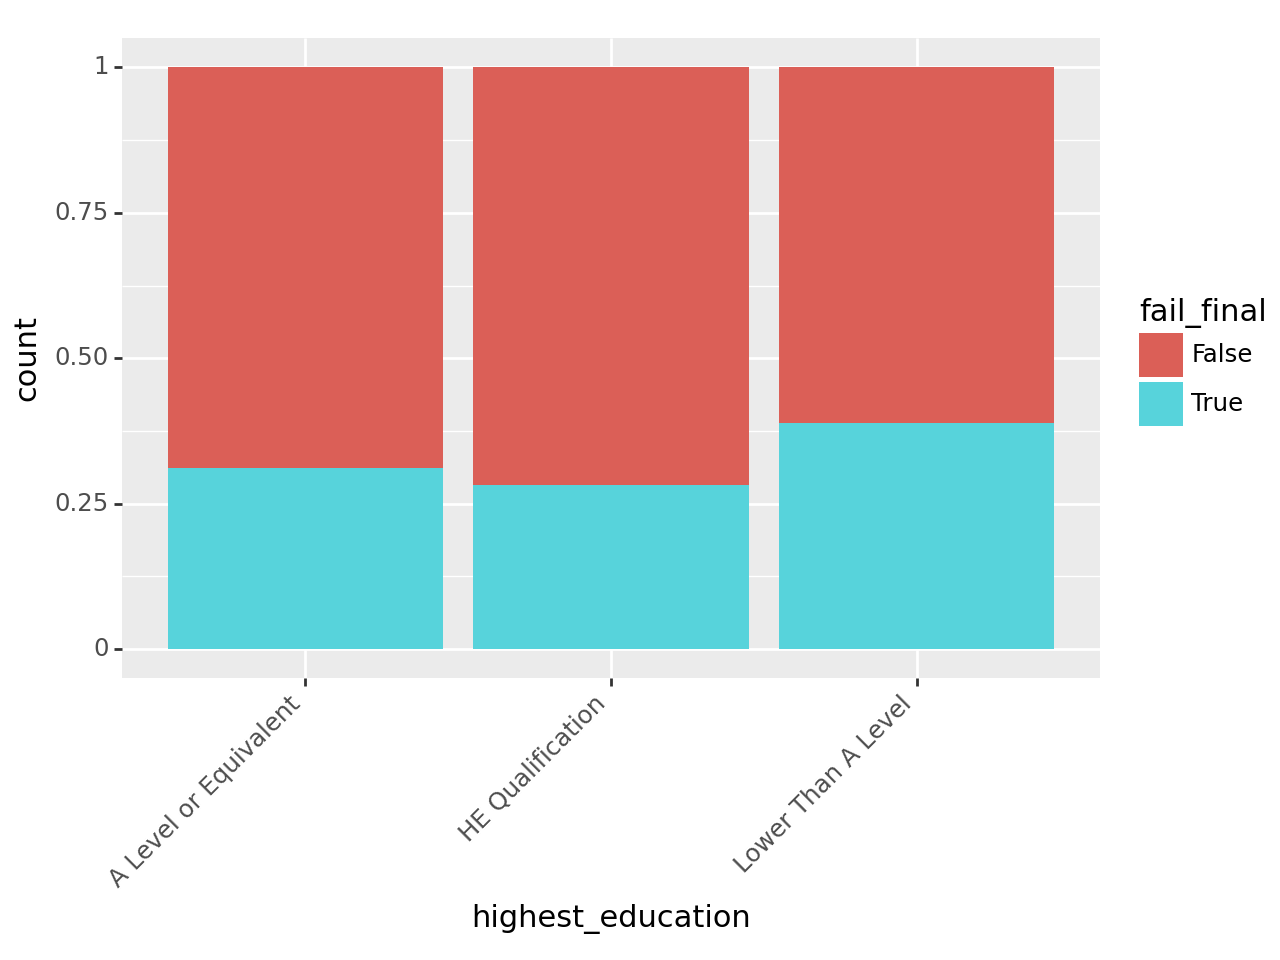

<Figure Size: (640 x 480)>

In [98]:
(
    ggplot(train)
    + aes(x='highest_education', fill='fail_final')
    + geom_bar(position='fill')
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

Imd_band

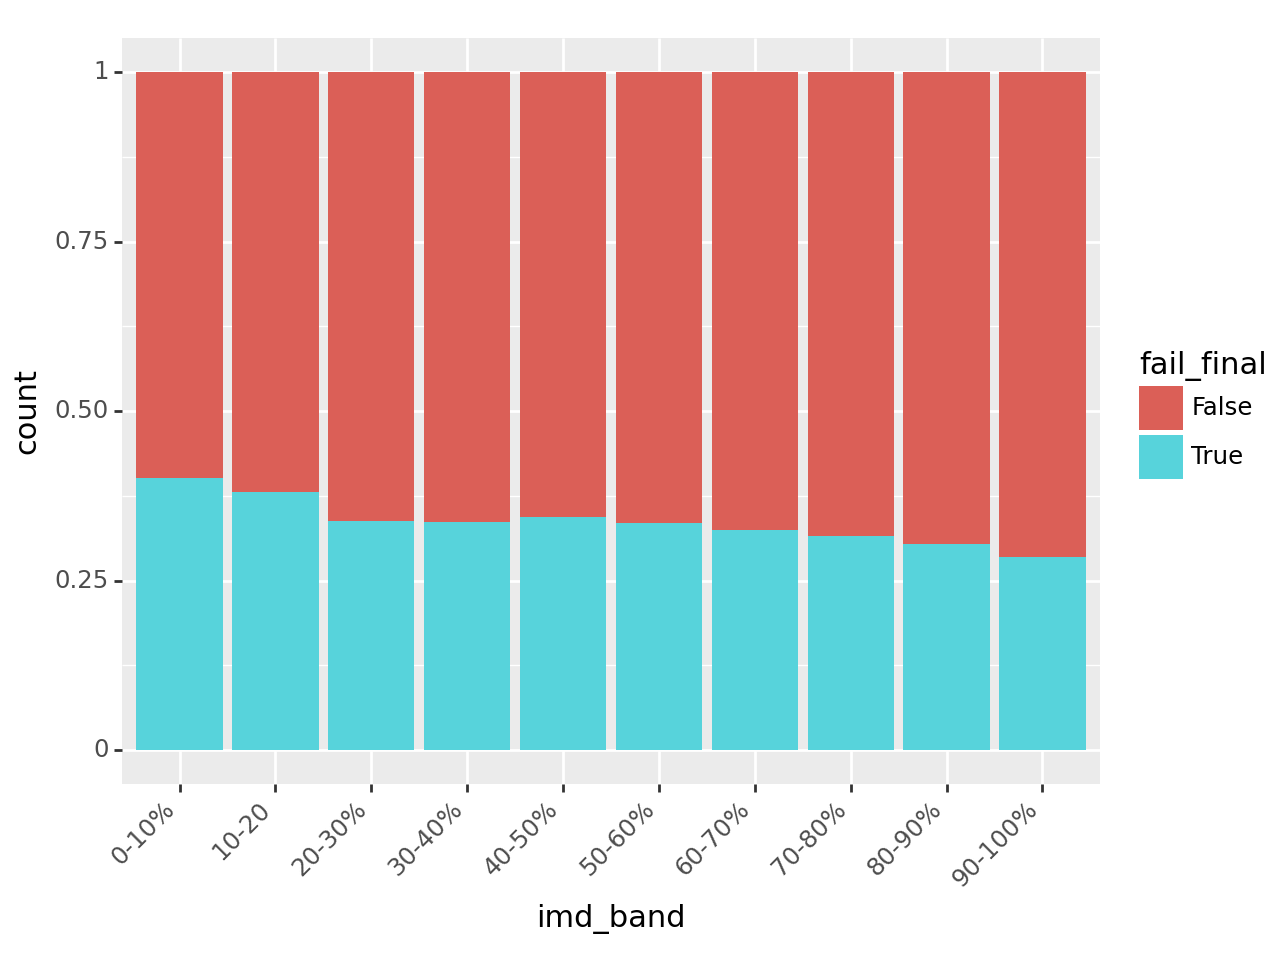

<Figure Size: (640 x 480)>

In [99]:
(
    ggplot(train)
    + aes(x='imd_band', fill='fail_final')
    + geom_bar(position='fill')
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

AGE_band

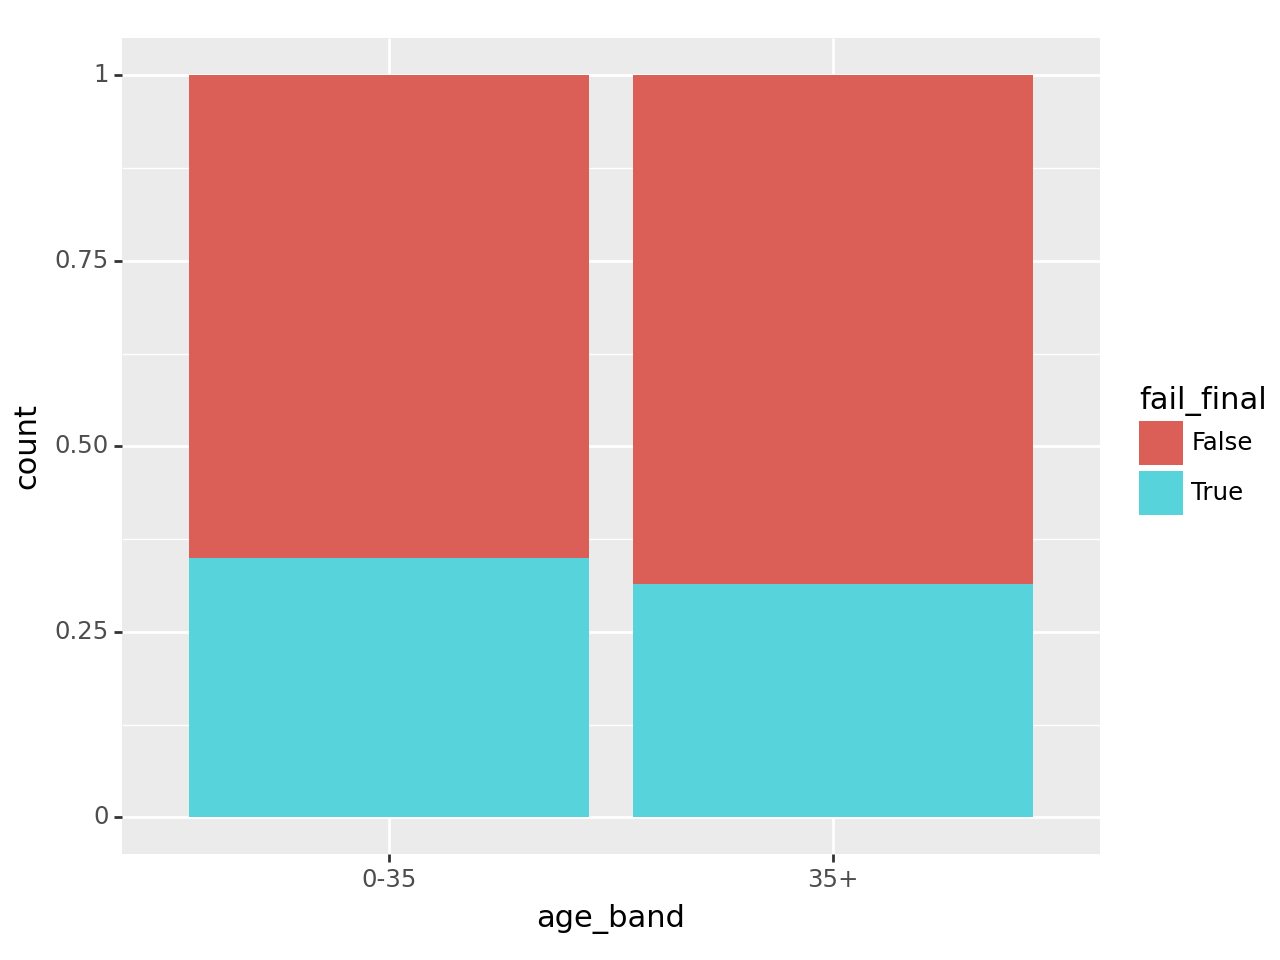

<Figure Size: (640 x 480)>

In [100]:
(
    ggplot(train)
    + aes(x='age_band', fill='fail_final')
    + geom_bar(position='fill')
)

**Regression**


model preparation

In [101]:
# Separate features from target

'''Training set'''
# Drop target and helper columns
X_train = train.drop(columns=['fail_final', 'weighted_score'])
# Make an array with target
Y_train = train['weighted_score'].copy()

'''Test set'''
# Drop target column
X_test = test.drop(columns=['weighted_score'])
# Make an array with target
Y_test = test['weighted_score'].copy()

X_train.head()

code_module code_presentation  date_registration  \
16563         DDD             2014B              -36.0   
16006         DDD             2013J              -32.0   
12884         CCC             2014J              -21.0   
27781         FFF             2014J             -124.0   
25125         FFF             2013J             -114.0   

       module_presentation_length gender                region  \
16563                         241      F   East Anglian Region   
16006                         261      M              Scotland   
12884                         269      M          South Region   
27781                         269      M  West Midlands Region   
25125                         268      M     South East Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
16563  A Level or Equivalent   50-60%     0-35                     1   
16006  A Level or Equivalent   20-30%     0-35                     0   
12884       HE Qualification   70-80%      35+                     0   
27781     Lower Than A Level    10-20     0-35                     0   
25125     Lower Than A Level    10-20      35+                     0   

       studied_credits disability  total_click  late_rate  fail_rate  
16563               70          N          0.0   0.142857        0.0  
16006              120          N          0.0   0.000000        0.0  
12884               60          N          0.0   0.875000        0.0  
27781               60          N          0.0   0.181818        0.0  
25125               60          N          0.0   0.000000        0.0

In [102]:
'''Make a copy for the subsequent last evaluation'''
X_train_eval = X_train.copy()
Y_train_eval = Y_train.copy()
X_test_eval = X_test.copy()
Y_test_eval = Y_test.copy()

In [103]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import make_column_transformer

# Set encoding and scaling instructions
column_transform = make_column_transformer(
    (OneHotEncoder(), ['code_module', 'code_presentation', 'gender', 'region', 'age_band', 'disability']),
    (OrdinalEncoder(), ['highest_education', 'imd_band']),
    (RobustScaler(), ['date_registration', 'module_presentation_length',
                       'num_of_prev_attempts', 'studied_credits', 'total_click', 'late_rate',
                       'fail_rate'])
)

# Apply column transformer to features
X_encoded = column_transform.fit_transform(X_train)

In [104]:
# Have a look at what the scaled and encoded data looks like
pd.DataFrame(X_encoded).head()

0    1    2    3    4    5    6    7    8    9   ...   29   30   31  \
0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  5.0   
1  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  2.0   
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  7.0   
3  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  2.0  1.0   
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  2.0  1.0   

         32        33   34        35        36        37   38  
0  0.291667 -0.777778  1.0  0.166667 -0.542725 -0.102857  0.0  
1  0.347222 -0.037037  0.0  1.000000 -0.542725 -0.360000  0.0  
2  0.500000  0.259259  0.0  0.000000 -0.542725  1.215000  0.0  
3 -0.930556  0.259259  0.0  0.000000 -0.542725 -0.032727  0.0  
4 -0.791667  0.222222  0.0  0.000000 -0.542725 -0.360000  0.0  

[5 rows x 39 columns]

**Models**

Linear Regression

Linear regression is most likely going to be a bad model as the data breaks several of the assumptions of this model.
The assumptions are as follows:
Linear relationship between the target and features.
The pair plots show this isn't the case.
Multivariate normality - all variables must be normal.
The histograms of the numerical variables show that their distributions aren't normal.
Little to no multicollinearity - all variables must be independent from each other.
The correlation matrix shows that this isn't so.
No auto-correlation - when the value of y(x+1) is independent from the value of y(x).
Homoscedasticity - residuals must be equal along the regression line.
Linear regression can show us an example of a bad model, showing how other models can vastly improve the predictions.



In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Setting up the pipeline
lm = LinearRegression()

lm_pipeline = make_pipeline(column_transform, lm)

# Fit the training data
lm_pipeline.fit(X_train, Y_train)
# Predict the training data
lm_train_predictions = lm_pipeline.predict(X_train)

In [106]:
# Now let's evaluate the model
import sklearn.metrics as metrics

def regression_eval(X, y, predictions):
    MSE = metrics.mean_squared_error(y, predictions)
    RMSE = np.sqrt(MSE)
    R2 = metrics.r2_score(y, predictions)
    adj_R2 = 1 - ( (1-R2)*(len(y)-1)/(len(y)-X.shape[1]-1) )

    print("-----------------------")
    print('RMSE is {}'.format(RMSE))
    print('Adjusted R2 score is {}\n'.format(adj_R2))

### For training set ###
print("Model performance for training set:")
regression_eval(X_train, Y_train, lm_train_predictions)

Model performance for training set:
-----------------------
RMSE is 27.00893370960526
Adjusted R2 score is 0.2033920643452145



The above evaluation of the model is using our uses a randomised training and test set split, then calculates RMSE and adjusted-R2. Adjusted-R2 shows the model explains 35% of the total variance in the sample. RMSE of 23.8 shows us the error - predictions are off by 23.8 points. This is a large error considering the fail mark is only 40%.

In [107]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, column_transform.fit_transform(X_train), Y_train, cv=10, scoring='neg_mean_squared_error')
lm_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores\t:', scores)
    print('Mean\t:', scores.mean())
    print('SD\t:', scores.std())
display_scores(lm_rmse_scores)

Scores	: [27.46407449 26.5050957  26.48338021 27.72973593 27.24882204 26.8113389
 26.97115476 26.8154955  27.1045002  27.40899831]
Mean	: 27.05425960624247
SD	: 0.39253588018554825


Cross-validation uses stratified k-fold cross-validation which is different from validation with randomised values. The training set is split into a smaller training set and an even smaller validation set. Each of these sets are then used for training and validation sequentially. Cross-validation also shows us the model performs abysmally, just as expected.

Decision Tree


This model uses a very different approach - building a what is essentially a flow chart based on probabilities and likelihoods. It is a simple algorithm with many models using it as a base algorithm (e.g. Random Forest).

In [108]:
from sklearn.tree import DecisionTreeRegressor

Dtree = DecisionTreeRegressor(min_samples_leaf=15, min_samples_split=10, max_features=13)

Dtree_pipeline = make_pipeline(column_transform, Dtree)

Dtree_pipeline.fit(X_train, Y_train)

train_Dtree_predictions = Dtree_pipeline.predict(X_train)

### Evaluating the model ###
print("Model performance for training set:")
regression_eval(X_train, Y_train, train_Dtree_predictions)

Model performance for training set:
-----------------------
RMSE is 22.16203045126824
Adjusted R2 score is 0.4636493081995984



In [109]:
scores = cross_val_score(Dtree, column_transform.fit_transform(X_train), Y_train, cv=5, scoring='neg_mean_squared_error')

Dtree_rmse_scores = np.sqrt(-scores)
display_scores(Dtree_rmse_scores)

Scores	: [25.42317994 25.78908881 26.07331791 25.94282216 25.39452497]
Mean	: 25.72458676063109
SD	: 0.27319863737156963


K Nearest Neighbours Regression

KNN-Regression examines the point close to the target point and then makes a prediction on which class these data points belong to.

In [110]:
from sklearn.neighbors import KNeighborsRegressor

KNReg = KNeighborsRegressor(n_neighbors=2)

KNReg_pipeline = make_pipeline(column_transform, KNReg)

KNReg_pipeline.fit(X_train, Y_train)

train_KNReg_predictions = KNReg_pipeline.predict(X_train)

### Evaluating the model ###
print("Model performance for training set:")
regression_eval(X_train, Y_train, train_KNReg_predictions)

Model performance for training set:
-----------------------
RMSE is 19.247816461915214
Adjusted R2 score is 0.5954309197456498



In [111]:
scores = cross_val_score(KNReg, column_transform.fit_transform(X_train), Y_train, cv=5, scoring='neg_mean_squared_error')

KNReg_rmse_scores = np.sqrt(-scores)
display_scores(KNReg_rmse_scores)

Scores	: [33.29889186 33.34006999 33.47508103 33.50954947 33.61278295]
Mean	: 33.44727506036353
SD	: 0.1145029560403488


Random Forest

In [112]:
from sklearn.ensemble import RandomForestRegressor

RForest = RandomForestRegressor(min_samples_leaf=15, min_samples_split=10,
                                max_features=13, n_estimators=20)

RForest_pipeline = make_pipeline(column_transform, RForest)

RForest_pipeline.fit(X_train, Y_train)

train_RForest_predictions = RForest_pipeline.predict(X_train)

### Evaluating the model ###
print("Model performance for training set:")
regression_eval(X_train, Y_train, train_RForest_predictions)

Model performance for training set:
-----------------------
RMSE is 21.84270847046474
Adjusted R2 score is 0.4789939944829905



In [113]:
scores = cross_val_score(RForest, column_transform.fit_transform(X_train), Y_train, cv=5, scoring='neg_mean_squared_error')

RForest_rmse_scores = np.sqrt(-scores)
display_scores(RForest_rmse_scores)

Scores	: [23.60455172 23.87533037 23.82154874 23.87346647 23.89264068]
Mean	: 23.81350759367239
SD	: 0.107150721045399


support vector regression


Linear models are doing badly, as expected. We will next use non-linear models and see if our predictions improve.
Support Vector Regression seeks not to minimise the squared error as in the linear regression, but to minimise coefficients.

In [114]:
from sklearn.svm import SVR

SVR = SVR(kernel='rbf')

SVR_pipeline = make_pipeline(column_transform, SVR)

SVR_pipeline.fit(X_train, Y_train)

train_SVR_predictions = SVR_pipeline.predict(X_train)

### Evaluating the model ###
print("Model performance for training set:")
regression_eval(X_train, Y_train, train_SVR_predictions)

Model performance for training set:
-----------------------
RMSE is 27.58378874549837
Adjusted R2 score is 0.16912137475949185



In [115]:
scores = cross_val_score(SVR, column_transform.fit_transform(X_train), Y_train, cv=4, scoring='neg_mean_squared_error')

SVR_rmse_scores = np.sqrt(-scores)
display_scores(SVR_rmse_scores)

Scores	: [27.60848003 27.97666461 27.56569268 28.28110677]
Mean	: 27.85798602203321
SD	: 0.29189228133113526


The model is an improvement on the linear models. Adjusted R2 is a bit higher (39%) and the standard error for RMSE scores in the cross-validated sets is lower (from SD = 0.39 for Random Forest to SD = 0.10). It is still not a great predictor for the dataset.

Clasification model


model preparation


In [119]:
train = train_class.copy()
test = test_class.copy()

train.head()

code_module code_presentation  date_registration  \
16563         DDD             2014B              -36.0   
16006         DDD             2013J              -32.0   
12884         CCC             2014J              -21.0   
27781         FFF             2014J             -124.0   
25125         FFF             2013J             -114.0   

       module_presentation_length gender                region  \
16563                         241      F   East Anglian Region   
16006                         261      M              Scotland   
12884                         269      M          South Region   
27781                         269      M  West Midlands Region   
25125                         268      M     South East Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
16563  A Level or Equivalent   50-60%     0-35                     1   
16006  A Level or Equivalent   20-30%     0-35                     0   
12884       HE Qualification   70-80%     55<=                     0   
27781     Lower Than A Level    10-20     0-35                     0   
25125     Lower Than A Level    10-20    35-55                     0   

       studied_credits disability final_result  total_click  
16563               70          N         Pass          0.0  
16006              120          N    Withdrawn          0.0  
12884               60          N         Pass          0.0  
27781               60          N         Fail          0.0  
25125               60          N         Fail          0.0

Last Cleaning

In [120]:
# Distinction as a Pass
train['final_result'] = np.where( (train['final_result'] == 'Distinction'),
                                           'Pass',
                                           train['final_result']
                                    )
# Withdrawn as a Fail (to make the target binary)
train['final_result'] = np.where( (train['final_result'] == 'Withdrawn'),
                                           'Fail',
                                           train['final_result']
                                    )
# Same for test set
test['final_result'] = np.where( (test['final_result'] == 'Distinction'),
                                           'Pass',
                                           test['final_result']
                                    )
test['final_result'] = np.where( (test['final_result'] == 'Withdrawn'),
                                           'Fail',
                                           test['final_result']
                                    )

In [121]:
# Rename 'no formal quals' into 'lower than a level'
train['highest_education'] = np.where( (train['highest_education'] == 'No Formal quals'),
                                           'Lower Than A Level',
                                           train['highest_education']
                                    )

# Rename post-grads
train['highest_education'] = np.where( (train['highest_education'] == 'Post Graduate Qualification'),
                                           'HE Qualification',
                                           train['highest_education']
                                    )


# Do the same for the test set
test['highest_education'] = np.where( (test['highest_education'] == 'No Formal quals'),
                                           'Lower Than A Level',
                                           test['highest_education']
                                    )

test['highest_education'] = np.where( (test['highest_education'] == 'Post Graduate Qualification'),
                                           'HE Qualification',
                                           test['highest_education']
                                    )
### Age bands ###
train['age_band'] = np.where( (train['age_band'] == '55<='),
                                           '35-55',
                                           train['age_band']
                                    )

train['age_band'] = np.where( (train['age_band'] == '35-55'),
                                           '35+',
                                           train['age_band']
                                    )

# Do the same for the test set
test['age_band'] = np.where( (test['age_band'] == '55<='),
                                           '35-55',
                                           test['age_band']
                                    )

test['age_band'] = np.where( (test['age_band'] == '35-55'),
                                           '35+',
                                           test['age_band']
                                    )


In [122]:
# Separate features from target

'''Training set'''
# Drop target column
X_train = train.drop(columns=['final_result'])
# Make an array with target
Y_train = train['final_result'].copy()

'''Test set'''
# Drop target column
X_test = test.drop(columns=['final_result'])
# Make an array with target
Y_test = test['final_result'].copy()

X_train.head()

code_module code_presentation  date_registration  \
16563         DDD             2014B              -36.0   
16006         DDD             2013J              -32.0   
12884         CCC             2014J              -21.0   
27781         FFF             2014J             -124.0   
25125         FFF             2013J             -114.0   

       module_presentation_length gender                region  \
16563                         241      F   East Anglian Region   
16006                         261      M              Scotland   
12884                         269      M          South Region   
27781                         269      M  West Midlands Region   
25125                         268      M     South East Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
16563  A Level or Equivalent   50-60%     0-35                     1   
16006  A Level or Equivalent   20-30%     0-35                     0   
12884       HE Qualification   70-80%      35+                     0   
27781     Lower Than A Level    10-20     0-35                     0   
25125     Lower Than A Level    10-20      35+                     0   

       studied_credits disability  total_click  
16563               70          N          0.0  
16006              120          N          0.0  
12884               60          N          0.0  
27781               60          N          0.0  
25125               60          N          0.0

In [123]:
X_train.shape

(26074, 13)

Encoding for trees

In [124]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import make_column_transformer

# Set encoding and scaling instructions
column_transform = make_column_transformer(
    (OneHotEncoder(), ['code_module', 'code_presentation', 'gender', 'region', 'disability']),
    (OrdinalEncoder(), ['highest_education', 'imd_band', 'age_band']),
    remainder='passthrough'
)

# Apply column transformer to features
X_encoded = column_transform.fit_transform(X_train)

In [125]:
pd.DataFrame(X_encoded).head()

0    1    2    3    4    5    6    7    8    9   ...   26   27   28   29  \
0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0  5.0   
1  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.0  2.0   
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  1.0  7.0   
3  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  2.0  1.0   
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  2.0  1.0   

    30     31     32   33     34   35  
0  0.0  -36.0  241.0  1.0   70.0  0.0  
1  0.0  -32.0  261.0  0.0  120.0  0.0  
2  1.0  -21.0  269.0  0.0   60.0  0.0  
3  0.0 -124.0  269.0  0.0   60.0  0.0  
4  1.0 -114.0  268.0  0.0   60.0  0.0  

[5 rows x 36 columns]

Models

Decision tree

In [129]:
from sklearn.tree import DecisionTreeClassifier

Dtree = DecisionTreeClassifier(min_samples_leaf=15, min_samples_split=10, max_features=8)

Dtree_pipeline = make_pipeline(column_transform, Dtree)

# Cross-validate
def display_accuracy_scores(pipeline, X, Y):
    scores = cross_val_score(pipeline, X, Y, cv=5, scoring='accuracy')
    print('Scores\t:', scores)
    print('Mean\t:', scores.mean())
    print('SD\t:', scores.std())

### Cross-validate ###
# Train set
print('Evaluation of the training set')
display_accuracy_scores(Dtree_pipeline, X_train, Y_train)

Evaluation of the training set
Scores	: [0.61093001 0.61457335 0.62013423 0.60460211 0.60663598]
Mean	: 0.611375134649283
SD	: 0.005576412308870381


Random forest

In [130]:
from sklearn.ensemble import RandomForestClassifier

RForest = RandomForestClassifier(min_samples_leaf=15, min_samples_split=10,
                                max_features=8, n_estimators=20)

RForest_pipeline = make_pipeline(column_transform, RForest)

### Cross-validate ###
# Train set
print('Evaluation of the training set')
display_accuracy_scores(RForest_pipeline, X_train, Y_train)

Evaluation of the training set
Scores	: [0.64793864 0.6506232  0.65292426 0.64391179 0.64902186]
Mean	: 0.6488839509823283
SD	: 0.002999468589052481


Random forest classifier model performed the best. Althrough its accuracy scores (0.64, SD = 0.002) .

In [131]:
# Test set evaluation for SVC
print('Evaluation of the test set')

# Fit the training data
SVClass_pipeline.fit(X_train, Y_train)
# Transform the test data
X_test_prepared = column_transform.transform(X_test)
# Predict the test data
SVClass_predictions_test = SVClass.predict(X_test_prepared)

print('Accuracy score:', metrics.accuracy_score(Y_test, SVClass_predictions_test))

Evaluation of the test set
Accuracy score: 0.6458045712532597


To quickly summarise, the best model for the regression task was support vector (RMSE = 18.4, SD = 0.2 with 4-fold cross-validation) which gave us RMSE = 18.1 and adjusted R2 = 0.63 when evaluated on the test set). This is without any fine-tuning of the hyperparameters. The best model for the classification task was a Random forest (0.78% accuracy score on the test set). Again, this is without any hyperparameter tuning.
linkcode
Next steps to take would be to find which features are most important and which can be dropped. Hyperparameter tuning can be used to find the best set of parameters for the models. Various dimensionality reduction tools can be used to improve the performance of the models. Another point to make is that accuracy score isn't the best way to evaluate classification models, especially when the target is imbalanced. We have an imbalanced target for this classification problem, so dealing with this imbalance and using a different evaluation metric would be advantageous.